<h1> EC558 Project Core Pipeline</h1>

<h2> 1: Data Loading and Initial Inspection </h2>

<h3>1.1: Imports and Basic Setup</h3>

In [97]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    auc,
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor

pd.set_option("display.max_columns", None) 

DATA_DIR = "../data" 
RAW_FILE = os.path.join(DATA_DIR, "historicdata_15min_6months_raw.csv")

<h3>1.2: Load Raw Dataset </h3>

In [2]:
df_raw = pd.read_csv(RAW_FILE) 
print("Shape (rows, columns):", df_raw.shape)
df_raw.head()

Shape (rows, columns): (4418, 18)


,Date Time,Date Time(RAW),Traffic Total (volume),Traffic Total (volume)(RAW),Traffic Total (speed),Traffic Total (speed)(RAW),Traffic In (volume),Traffic In (volume)(RAW),Traffic In (speed),Traffic In (speed)(RAW),Traffic Out (volume),Traffic Out (volume)(RAW),Traffic Out (speed),Traffic Out (speed)(RAW),Downtime,Downtime(RAW),Coverage,Coverage(RAW)
0,3/1/2025 12:00:00 AM - 1:00:00 AM,45716.95833,"331,414,316 KByte",3.390000e+11,"752,542 kbit/s",94067760.37,"34,990,821 KByte",3.583060e+10,"79,454 kbit/s",9931701.854,"296,423,494 KByte",3.040000e+11,"673,088 kbit/s",84136058.51,0%,0.0,100%,10000.0
1,3/1/2025 1:00:00 AM - 2:00:00 AM,45717.00000,"309,228,336 KByte",3.170000e+11,"703,723 kbit/s",87965368.47,"33,772,629 KByte",3.458317e+10,"76,858 kbit/s",9607210.576,"275,455,708 KByte",2.820000e+11,"626,865 kbit/s",78358157.90,0%,0.0,100%,9999.0
2,3/1/2025 2:00:00 AM - 3:00:00 AM,45717.04167,"274,829,321 KByte",2.810000e+11,"625,443 kbit/s",78180405.69,"29,956,768 KByte",3.067573e+10,"68,174 kbit/s",8521770.157,"244,872,552 KByte",2.510000e+11,"557,269 kbit/s",69658635.54,0%,0.0,100%,9999.0
3,3/1/2025 3:00:00 AM - 4:00:00 AM,45717.08333,"219,381,312 KByte",2.250000e+11,"499,257 kbit/s",62407169.45,"23,546,502 KByte",2.411162e+10,"53,586 kbit/s",6698248.380,"195,834,811 KByte",2.010000e+11,"445,671 kbit/s",55708921.07,0%,0.0,100%,9999.0
4,3/1/2025 4:00:00 AM - 5:00:00 AM,45717.12500,"169,163,809 KByte",1.730000e+11,"384,971 kbit/s",48121314.89,"22,602,400 KByte",2.314486e+10,"51,437 kbit/s",6429609.299,"146,561,410 KByte",1.500000e+11,"333,534 kbit/s",41691705.60,0%,0.0,100%,9999.0


<h3>1.3: Basic Info About Columns</h3>

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date Time                    4418 non-null   object 
 1   Date Time(RAW)               4416 non-null   float64
 2   Traffic Total (volume)       4418 non-null   object 
 3   Traffic Total (volume)(RAW)  4416 non-null   float64
 4   Traffic Total (speed)        4417 non-null   object 
 5   Traffic Total (speed)(RAW)   4416 non-null   float64
 6   Traffic In (volume)          4418 non-null   object 
 7   Traffic In (volume)(RAW)     4416 non-null   float64
 8   Traffic In (speed)           4417 non-null   object 
 9   Traffic In (speed)(RAW)      4416 non-null   float64
 10  Traffic Out (volume)         4418 non-null   object 
 11  Traffic Out (volume)(RAW)    4416 non-null   float64
 12  Traffic Out (speed)          4417 non-null   object 
 13  Traffic Out (speed

<h3>1.4: Stats for numeric Columns</h3>

In [4]:
df_raw.describe()

,Date Time(RAW),Traffic Total (volume)(RAW),Traffic Total (speed)(RAW),Traffic In (volume)(RAW),Traffic In (speed)(RAW),Traffic Out (volume)(RAW),Traffic Out (speed)(RAW),Downtime(RAW),Coverage(RAW)
count,4416.000000,4.416000e+03,4.416000e+03,4.416000e+03,4.416000e+03,4.416000e+03,4.416000e+03,4416.000000,4416.000000
mean,45808.937500,2.697381e+11,7.519989e+07,2.622148e+10,7.308459e+06,2.435120e+11,6.789143e+07,0.568963,9994.289629
std,53.122238,9.499039e+10,2.635654e+07,8.452537e+09,2.339738e+06,8.774713e+10,2.435466e+07,6.694339,29.901986
min,45716.958330,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,9348.000000
25%,45762.947915,1.830000e+11,5.135180e+07,1.994645e+10,5.583655e+06,1.660000e+11,4.636938e+07,0.000000,9999.000000
50%,45808.937500,2.910000e+11,8.104201e+07,2.687048e+10,7.481708e+06,2.630000e+11,7.346625e+07,0.000000,9999.000000
75%,45854.927085,3.450000e+11,9.624629e+07,3.230263e+10,8.999091e+06,3.140000e+11,8.734059e+07,0.000000,9999.000000
max,45900.916670,4.420000e+11,1.227932e+08,5.279937e+10,1.470660e+07,4.040000e+11,1.123344e+08,100.000000,10000.000000


<h3>1.5: Column List</h3>

In [5]:
df_raw.columns.tolist()

['Date Time',
 'Date Time(RAW)',
 'Traffic Total (volume)',
 'Traffic Total (volume)(RAW)',
 'Traffic Total (speed)',
 'Traffic Total (speed)(RAW)',
 'Traffic In (volume)',
 'Traffic In (volume)(RAW)',
 'Traffic In (speed)',
 'Traffic In (speed)(RAW)',
 'Traffic Out (volume)',
 'Traffic Out (volume)(RAW)',
 'Traffic Out (speed)',
 'Traffic Out (speed)(RAW)',
 'Downtime',
 'Downtime(RAW)',
 'Coverage',
 'Coverage(RAW)']

In [6]:
df_raw["Date Time"].head()

0    3/1/2025 12:00:00 AM - 1:00:00 AM
1     3/1/2025 1:00:00 AM - 2:00:00 AM
2     3/1/2025 2:00:00 AM - 3:00:00 AM
3     3/1/2025 3:00:00 AM - 4:00:00 AM
4     3/1/2025 4:00:00 AM - 5:00:00 AM
Name: Date Time, dtype: object

In [7]:
df_raw["Date Time(RAW)"].head()

0    45716.95833
1    45717.00000
2    45717.04167
3    45717.08333
4    45717.12500
Name: Date Time(RAW), dtype: float64

In [8]:
df_raw["Traffic Total (speed)"].head()

0    752,542 kbit/s
1    703,723 kbit/s
2    625,443 kbit/s
3    499,257 kbit/s
4    384,971 kbit/s
Name: Traffic Total (speed), dtype: object

In [9]:
df_raw["Traffic Total (speed)(RAW)"].head()

0    94067760.37
1    87965368.47
2    78180405.69
3    62407169.45
4    48121314.89
Name: Traffic Total (speed)(RAW), dtype: float64

<h3>1.6: Checking Missing Values</h3>

In [10]:
null_counts = df_raw.isna().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Downtime                       4
Date Time(RAW)                 2
Traffic Total (volume)(RAW)    2
Traffic Total (speed)(RAW)     2
Traffic In (volume)(RAW)       2
Traffic In (speed)(RAW)        2
Traffic Out (volume)(RAW)      2
Traffic Out (speed)(RAW)       2
Downtime(RAW)                  2
Coverage(RAW)                  2
Traffic Total (speed)          1
Traffic In (speed)             1
Traffic Out (speed)            1
Coverage                       1
dtype: int64

In [11]:
null_pct = (df_raw.isna().sum() / len(df_raw)) * 100
null_pct[null_pct > 0].sort_values(ascending=False)

Downtime                       0.090539
Date Time(RAW)                 0.045269
Traffic Total (volume)(RAW)    0.045269
Traffic Total (speed)(RAW)     0.045269
Traffic In (volume)(RAW)       0.045269
Traffic In (speed)(RAW)        0.045269
Traffic Out (volume)(RAW)      0.045269
Traffic Out (speed)(RAW)       0.045269
Downtime(RAW)                  0.045269
Coverage(RAW)                  0.045269
Traffic Total (speed)          0.022635
Traffic In (speed)             0.022635
Traffic Out (speed)            0.022635
Coverage                       0.022635
dtype: float64

<h3>1.7: Check for Fully Duplicated Rows</h3>

In [12]:
num_dupes = df_raw.duplicated().sum()
print("Number of fully duplicated rows:", num_dupes)

Number of fully duplicated rows: 0


<h3> 1.8: Summary of Findings</h3>

<p>
 
- Dataset shape: approximately `[4418]` rows and `[18]` columns.
    
- Key time columns:
    
  - `Date Time` (string interval).
    
  - `Date Time(RAW)` (numeric timestamp).
    
- Key traffic columns identified:
    
  - `Traffic Total (speed)` and `Traffic Total (speed)(RAW)`.
    
  - `Traffic In (volume)(RAW)`, `Traffic Out (volume)(RAW)`, etc.
    
- Missing values:
    
Downtime                       4
    
Date Time(RAW)                 2
    
Traffic Total (volume)(RAW)    2
    
Traffic Total (speed)(RAW)     2
    
Traffic In (volume)(RAW)       2
    
Traffic In (speed)(RAW)        2
    
Traffic Out (volume)(RAW)      2
    
Traffic Out (speed)(RAW)       2
    
Downtime(RAW)                  2
    
Coverage(RAW)                  2
    
Traffic Total (speed)          1
    
Traffic In (speed)             1
    
Traffic Out (speed)            1
    
Coverage                       1
    
- Duplicated rows: No duplicated rows found
    
</p>

<h2>2: Cleaning and Timestamp</h2>

<h3>2.1: Making a working copy of the raw dataframe</h3>

In [13]:
df = df_raw.copy()
print("Original df_raw shape", df_raw.shape)
print("Working df shape:", df.shape)

Original df_raw shape (4418, 18)
Working df shape: (4418, 18)


<h3>2.2: Convert Excel date time(RAW) to real datetime</h3>

In [14]:
df["timestamp"] = pd.to_datetime(df["Date Time(RAW)"], unit="D", origin="1899-12-30").dt.round("1h")
df[["Date Time", "Date Time(RAW)", "timestamp"]].head()

,Date Time,Date Time(RAW),timestamp
0,3/1/2025 12:00:00 AM - 1:00:00 AM,45716.95833,2025-02-28 23:00:00
1,3/1/2025 1:00:00 AM - 2:00:00 AM,45717.00000,2025-03-01 00:00:00
2,3/1/2025 2:00:00 AM - 3:00:00 AM,45717.04167,2025-03-01 01:00:00
3,3/1/2025 3:00:00 AM - 4:00:00 AM,45717.08333,2025-03-01 02:00:00
4,3/1/2025 4:00:00 AM - 5:00:00 AM,45717.12500,2025-03-01 03:00:00


<h3>2.3: Drop rows with NaNs in key RAW columns</h3>

In [15]:
key_cols = [
    "Date Time(RAW)",
    "Traffic Total (volume)(RAW)",
    "Traffic Total (speed)(RAW)",
    "Traffic In (volume)(RAW)",
    "Traffic In (speed)(RAW)",
    "Traffic Out (volume)(RAW)",
    "Traffic Out (speed)(RAW)",
    "Downtime(RAW)",
    "Coverage(RAW)",
]

before_rows = len(df)
df = df.dropna(subset=key_cols)
after_rows = len(df)

print("Rows before dropping NaNs:", before_rows)
print("Rows after  dropping NaNs:", after_rows)
print("Rows removed:", before_rows - after_rows)

print("\nRemaining NaNs in key columns:")
print(df[key_cols].isna().sum())

Rows before dropping NaNs: 4418
Rows after  dropping NaNs: 4416
Rows removed: 2

Remaining NaNs in key columns:
Date Time(RAW)                 0
Traffic Total (volume)(RAW)    0
Traffic Total (speed)(RAW)     0
Traffic In (volume)(RAW)       0
Traffic In (speed)(RAW)        0
Traffic Out (volume)(RAW)      0
Traffic Out (speed)(RAW)       0
Downtime(RAW)                  0
Coverage(RAW)                  0
dtype: int64


<h3>2.4: Removing the Cols We Won't Use</h3>

In [16]:
cols_to_keep = [
    "timestamp",
    "Traffic Total (volume)(RAW)",
    "Traffic Total (speed)(RAW)",
    "Traffic In (volume)(RAW)",
    "Traffic In (speed)(RAW)",
    "Traffic Out (volume)(RAW)",
    "Traffic Out (speed)(RAW)",
    "Downtime(RAW)",
    "Coverage(RAW)",
]

df = df[cols_to_keep].copy()
df.head()

,timestamp,Traffic Total (volume)(RAW),Traffic Total (speed)(RAW),Traffic In (volume)(RAW),Traffic In (speed)(RAW),Traffic Out (volume)(RAW),Traffic Out (speed)(RAW),Downtime(RAW),Coverage(RAW)
0,2025-02-28 23:00:00,3.390000e+11,94067760.37,3.583060e+10,9931701.854,3.040000e+11,84136058.51,0.0,10000.0
1,2025-03-01 00:00:00,3.170000e+11,87965368.47,3.458317e+10,9607210.576,2.820000e+11,78358157.90,0.0,9999.0
2,2025-03-01 01:00:00,2.810000e+11,78180405.69,3.067573e+10,8521770.157,2.510000e+11,69658635.54,0.0,9999.0
3,2025-03-01 02:00:00,2.250000e+11,62407169.45,2.411162e+10,6698248.380,2.010000e+11,55708921.07,0.0,9999.0
4,2025-03-01 03:00:00,1.730000e+11,48121314.89,2.314486e+10,6429609.299,1.500000e+11,41691705.60,0.0,9999.0


<h3>2.5: Renaming the Cols</h3>

In [17]:
df = df.rename(columns={
    "Traffic Total (volume)(RAW)": "total_volume",
    "Traffic Total (speed)(RAW)": "total_speed", 
    "Traffic In (volume)(RAW)": "in_volume",
    "Traffic In (speed)(RAW)": "in_speed",
    "Traffic Out (volume)(RAW)": "out_volume",
    "Traffic Out (speed)(RAW)": "out_speed",
    "Downtime(RAW)": "downtime",
    "Coverage(RAW)": "coverage",
})

df.head()

,timestamp,total_volume,total_speed,in_volume,in_speed,out_volume,out_speed,downtime,coverage
0,2025-02-28 23:00:00,3.390000e+11,94067760.37,3.583060e+10,9931701.854,3.040000e+11,84136058.51,0.0,10000.0
1,2025-03-01 00:00:00,3.170000e+11,87965368.47,3.458317e+10,9607210.576,2.820000e+11,78358157.90,0.0,9999.0
2,2025-03-01 01:00:00,2.810000e+11,78180405.69,3.067573e+10,8521770.157,2.510000e+11,69658635.54,0.0,9999.0
3,2025-03-01 02:00:00,2.250000e+11,62407169.45,2.411162e+10,6698248.380,2.010000e+11,55708921.07,0.0,9999.0
4,2025-03-01 03:00:00,1.730000e+11,48121314.89,2.314486e+10,6429609.299,1.500000e+11,41691705.60,0.0,9999.0


<h3>2.6: Sort by Time and Reset Index</h3>

In [18]:
df = df.sort_values("timestamp").reset_index(drop=True)
df[["timestamp", "total_speed"]].head()

,timestamp,total_speed
0,2025-02-28 23:00:00,94067760.37
1,2025-03-01 00:00:00,87965368.47
2,2025-03-01 01:00:00,78180405.69
3,2025-03-01 02:00:00,62407169.45
4,2025-03-01 03:00:00,48121314.89


In [19]:
df[["timestamp", "total_speed"]].tail()

,timestamp,total_speed
4411,2025-08-31 18:00:00,8.944208e+07
4412,2025-08-31 19:00:00,1.143365e+08
4413,2025-08-31 20:00:00,1.089858e+08
4414,2025-08-31 21:00:00,8.790941e+07
4415,2025-08-31 22:00:00,8.736367e+07


<h3>2.7: Final Check</h3>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     4416 non-null   datetime64[ns]
 1   total_volume  4416 non-null   float64       
 2   total_speed   4416 non-null   float64       
 3   in_volume     4416 non-null   float64       
 4   in_speed      4416 non-null   float64       
 5   out_volume    4416 non-null   float64       
 6   out_speed     4416 non-null   float64       
 7   downtime      4416 non-null   float64       
 8   coverage      4416 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 310.6 KB


In [21]:
print("missing values per column:")
print(df.isna().sum())

missing values per column:
timestamp       0
total_volume    0
total_speed     0
in_volume       0
in_speed        0
out_volume      0
out_speed       0
downtime        0
coverage        0
dtype: int64


In [22]:
print("Summary stats for target (total_speed):")
print(df["total_speed"].describe())

Summary stats for target (total_speed):
count    4.416000e+03
mean     7.519989e+07
std      2.635654e+07
min      0.000000e+00
25%      5.135180e+07
50%      8.104201e+07
75%      9.624629e+07
max      1.227932e+08
Name: total_speed, dtype: float64


<h2> 3: Exploratory Data Analysis </h2>

<h2> 3.1: Add time-based helper columns</h3>

In [23]:
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek
df[["timestamp", "hour", "dayofweek"]].head()

,timestamp,hour,dayofweek
0,2025-02-28 23:00:00,23,4
1,2025-03-01 00:00:00,0,5
2,2025-03-01 01:00:00,1,5
3,2025-03-01 02:00:00,2,5
4,2025-03-01 03:00:00,3,5


<h3>3.2: Gobal time-series plot of total_speed </h3>

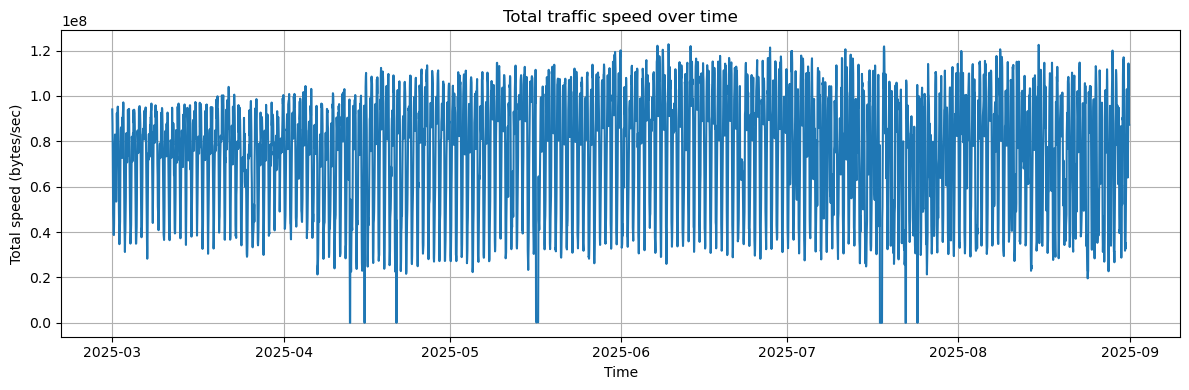

In [24]:
plt.figure(figsize=(12, 4))
plt.plot(df["timestamp"], df["total_speed"])
plt.xlabel("Time")
plt.ylabel("Total speed (bytes/sec)")
plt.title("Total traffic speed over time")
plt.tight_layout()
plt.grid(True)
plt.show()

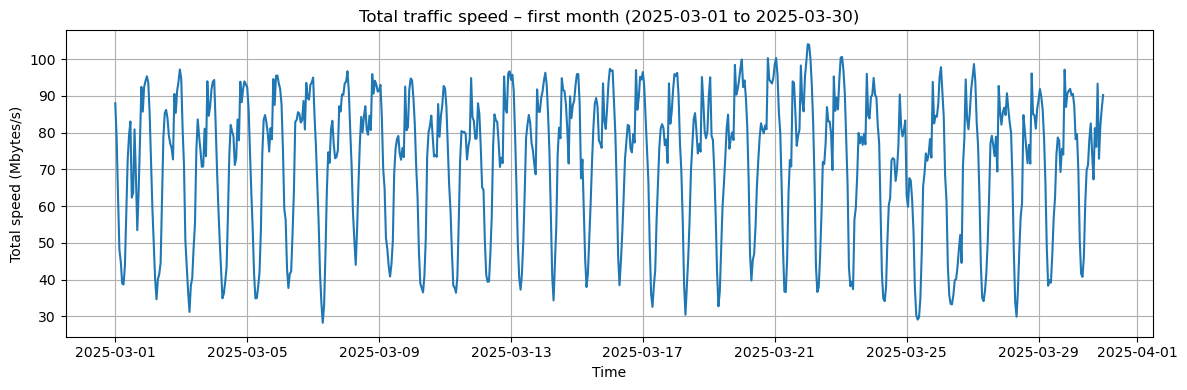

In [25]:
start = pd.Timestamp("2025-03-01") 
month_end = start + pd.Timedelta(days=30)

df_month = df[(df["timestamp"] >= start) & (df["timestamp"] < month_end)]

plt.figure(figsize=(12, 4))
plt.plot(df_month["timestamp"], df_month["total_speed"]/1e6)
plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/s)")
plt.title(f"Total traffic speed – first month ({start.date()} to {(month_end - pd.Timedelta(days=1)).date()})")
plt.tight_layout()
plt.grid(True)
plt.show()

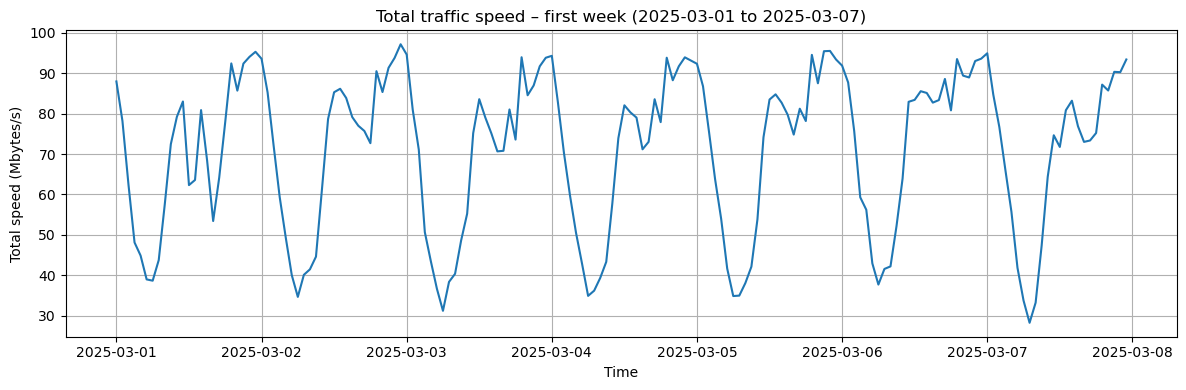

In [26]:
week_end = start + pd.Timedelta(days=7)

df_week = df[(df["timestamp"] >= start) & (df["timestamp"] < week_end)]

plt.figure(figsize=(12, 4))
plt.plot(df_week["timestamp"], df_week["total_speed"]/1e6)
plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/s)")
plt.title(f"Total traffic speed – first week ({start.date()} to {(week_end - pd.Timedelta(days=1)).date()})")
plt.tight_layout()
plt.grid(True)
plt.show()

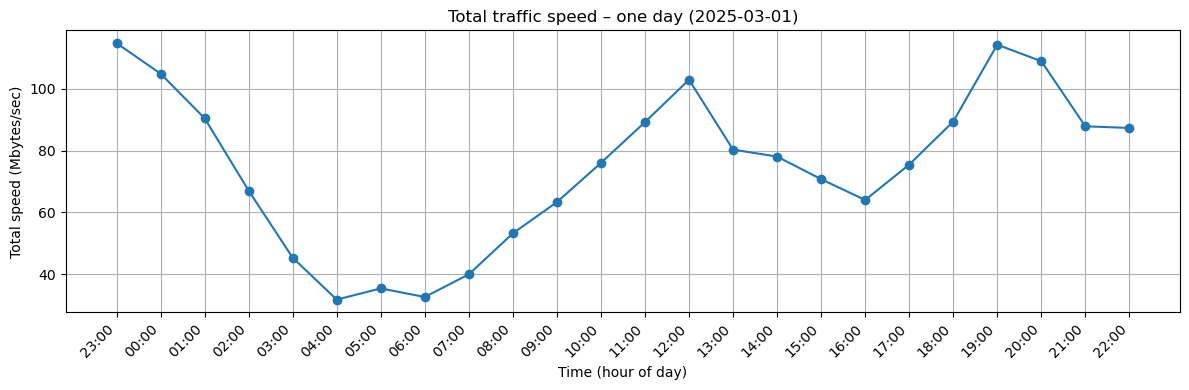

In [27]:
fig, ax = plt.subplots(figsize=(12, 4))

df_day = df.tail(24)   

ax.plot(df_day["timestamp"], df_day["total_speed"]/1e6, marker="o")

ax.set_xticks(df_day["timestamp"])
ax.set_xticklabels(
    df_day["timestamp"].dt.strftime("%H:%M"),
    rotation=45,
    ha="right",
)

ax.set_xlabel("Time (hour of day)")
ax.set_ylabel("Total speed (Mbytes/sec)")
ax.set_title(f"Total traffic speed – one day ({start.date()})")

fig.tight_layout()
plt.grid(True)
plt.show()

<h3>3.3: Average total_speed by hour of day</h3>

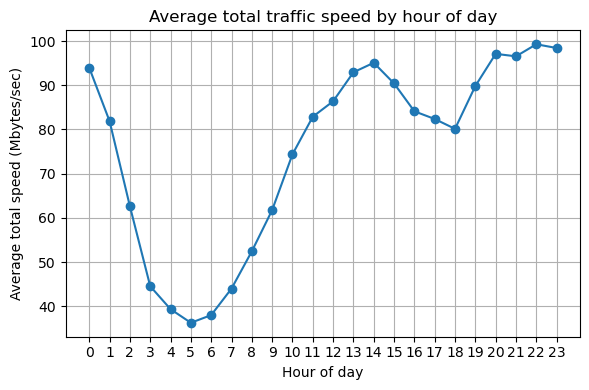

hour
0     9.395441e+07
1     8.187277e+07
2     6.261947e+07
3     4.454345e+07
4     3.936119e+07
5     3.627970e+07
6     3.802086e+07
7     4.401157e+07
8     5.244971e+07
9     6.176953e+07
10    7.438206e+07
11    8.288590e+07
12    8.637715e+07
13    9.293765e+07
14    9.508910e+07
15    9.041144e+07
16    8.411258e+07
17    8.237235e+07
18    8.014877e+07
19    8.983557e+07
20    9.710940e+07
21    9.654688e+07
22    9.927661e+07
23    9.842925e+07
Name: total_speed, dtype: float64

In [28]:
hourly_mean = df.groupby("hour")["total_speed"].mean()

plt.figure(figsize=(6, 4))
plt.plot(hourly_mean.index, hourly_mean.values/1e6, marker="o")

plt.xlabel("Hour of day")
plt.ylabel("Average total speed (Mbytes/sec)")
plt.title("Average total traffic speed by hour of day")
plt.xticks(range(0, 24))
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.grid(True)
plt.show()

hourly_mean

<h3>3.4: Average total_speed by day of week</h3>

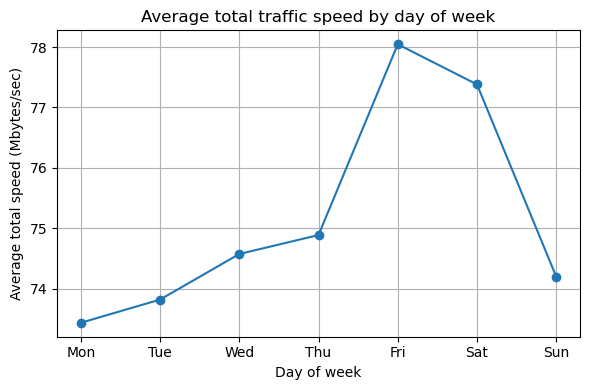

Mon    7.343614e+07
Tue    7.382049e+07
Wed    7.457480e+07
Thu    7.488860e+07
Fri    7.804681e+07
Sat    7.738142e+07
Sun    7.419939e+07
Name: total_speed, dtype: float64

In [29]:
dow_mean = df.groupby("dayofweek")["total_speed"].mean()
dow_mean.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

plt.figure(figsize=(6, 4))
plt.plot(dow_mean.index, dow_mean.values/1e6, marker="o")
plt.xlabel("Day of week")
plt.ylabel("Average total speed (Mbytes/sec)")
plt.title("Average total traffic speed by day of week")
plt.xticks(range(0, 7))
plt.ticklabel_format(style="plain", axis="y")
plt.tight_layout()
plt.grid(True)
plt.show()

dow_mean

<h3>3.5: Distribution of total_speed</h3>

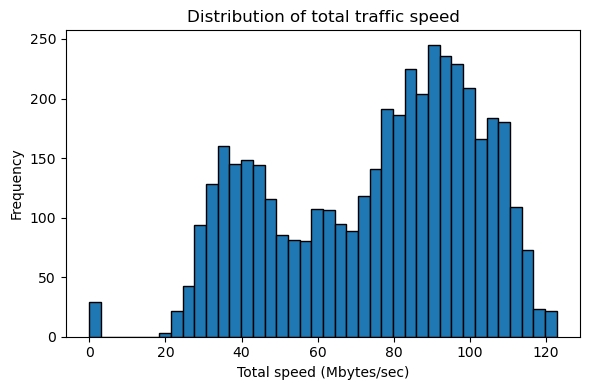

In [30]:
plt.figure(figsize=(6, 4))

plt.hist(
    df["total_speed"]/1e6,  
    bins=40,
    edgecolor="black"
)

plt.xlabel("Total speed (Mbytes/sec)")
plt.ylabel("Frequency")
plt.title("Distribution of total traffic speed")
plt.tight_layout()
plt.show()

<h3>3.6: Correlation between numeric features</h3>

In [31]:
num_cols = [
    "total_speed",
    "total_volume",
    "in_speed",
    "out_speed",
    "in_volume",
    "out_volume",
    "downtime",
    "coverage",
]

corr = df[num_cols].corr()
corr

,total_speed,total_volume,in_speed,out_speed,in_volume,out_volume,downtime,coverage
total_speed,1.000000,0.996233,0.867495,0.998857,0.862303,0.995407,-0.165972,-0.014803
total_volume,0.996233,1.000000,0.866649,0.994862,0.868858,0.998844,-0.195405,0.039164
in_speed,0.867495,0.866649,1.000000,0.842731,0.996302,0.842131,-0.188192,0.014773
out_speed,0.998857,0.994862,0.842731,1.000000,0.837468,0.996323,-0.161534,-0.017439
in_volume,0.862303,0.868858,0.996302,0.837468,1.000000,0.844167,-0.217025,0.069580
out_volume,0.995407,0.998844,0.842131,0.996323,0.844167,1.000000,-0.190622,0.035747
downtime,-0.165972,-0.195405,-0.188192,-0.161534,-0.217025,-0.190622,1.000000,-0.138039
coverage,-0.014803,0.039164,0.014773,-0.017439,0.069580,0.035747,-0.138039,1.000000


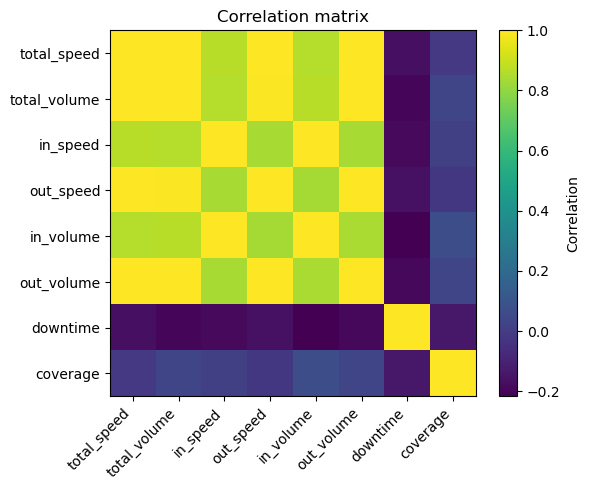

In [32]:
plt.figure(figsize=(6, 5))
plt.imshow(corr, aspect="auto")
plt.colorbar(label="Correlation")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

<h3>3.7: Average total_speed by dayofweek and hour</h3>

In [33]:
pivot_dow_hour = df.pivot_table(
    index="dayofweek",
    columns="hour",
    values="total_speed",
    aggfunc="mean",
)
pivot_dow_hour.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
pivot_dow_hour

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Mon,9.440009e+07,7.740186e+07,5.722950e+07,4.096139e+07,3.717694e+07,3.504084e+07,3.754041e+07,4.427812e+07,5.049360e+07,5.656635e+07,6.919205e+07,7.874906e+07,8.306442e+07,8.689190e+07,9.091478e+07,8.930993e+07,8.437658e+07,8.317765e+07,8.002788e+07,8.815547e+07,9.734429e+07,9.773413e+07,1.023354e+08,1.001048e+08
Tue,9.330570e+07,7.833452e+07,5.883374e+07,4.225422e+07,3.740102e+07,3.540263e+07,3.924831e+07,4.419954e+07,5.159348e+07,5.927946e+07,7.205618e+07,7.838526e+07,8.395077e+07,8.981554e+07,9.228802e+07,8.939548e+07,8.666995e+07,8.397431e+07,8.182378e+07,9.048989e+07,9.717080e+07,9.543861e+07,9.543082e+07,9.494975e+07
Wed,9.117719e+07,8.122082e+07,6.090887e+07,4.327419e+07,3.868927e+07,3.624925e+07,3.860227e+07,4.431012e+07,5.180899e+07,6.078169e+07,7.121310e+07,7.917087e+07,8.465812e+07,9.153000e+07,9.382375e+07,9.022403e+07,8.213644e+07,8.322702e+07,8.037504e+07,8.965277e+07,9.704005e+07,9.617070e+07,1.020027e+08,1.015480e+08
Thu,9.634427e+07,8.261649e+07,6.314182e+07,4.456906e+07,3.849420e+07,3.493140e+07,3.683126e+07,4.348203e+07,5.106849e+07,6.149429e+07,7.321236e+07,8.398185e+07,8.675067e+07,9.260935e+07,9.724512e+07,8.994743e+07,8.612016e+07,8.197927e+07,7.916854e+07,8.890075e+07,9.508071e+07,9.428416e+07,9.679977e+07,9.827293e+07
Fri,9.562950e+07,8.495895e+07,6.739643e+07,4.791203e+07,4.099807e+07,3.560212e+07,3.531736e+07,4.182699e+07,5.554723e+07,6.936641e+07,8.521391e+07,9.281037e+07,9.041217e+07,1.070529e+08,1.042786e+08,9.327717e+07,8.314533e+07,8.004319e+07,7.886746e+07,8.921043e+07,9.874154e+07,9.831103e+07,9.870076e+07,9.774578e+07
Sat,9.583867e+07,8.576306e+07,6.800105e+07,4.807873e+07,4.223357e+07,3.838318e+07,3.837099e+07,4.517717e+07,5.578744e+07,6.790089e+07,8.104919e+07,8.812072e+07,9.184211e+07,9.681684e+07,9.703761e+07,9.177354e+07,8.406470e+07,8.215850e+07,8.003348e+07,9.061958e+07,9.609010e+07,9.721614e+07,9.849792e+07,9.629891e+07
Sun,9.102563e+07,8.263478e+07,6.261798e+07,4.461581e+07,4.038541e+07,3.819395e+07,4.014044e+07,4.473441e+07,5.078444e+07,5.694726e+07,6.869975e+07,7.893386e+07,8.384883e+07,8.596597e+07,9.015081e+07,8.895608e+07,8.234477e+07,8.206650e+07,8.072737e+07,9.171756e+07,9.829201e+07,9.664390e+07,1.011277e+08,1.001928e+08


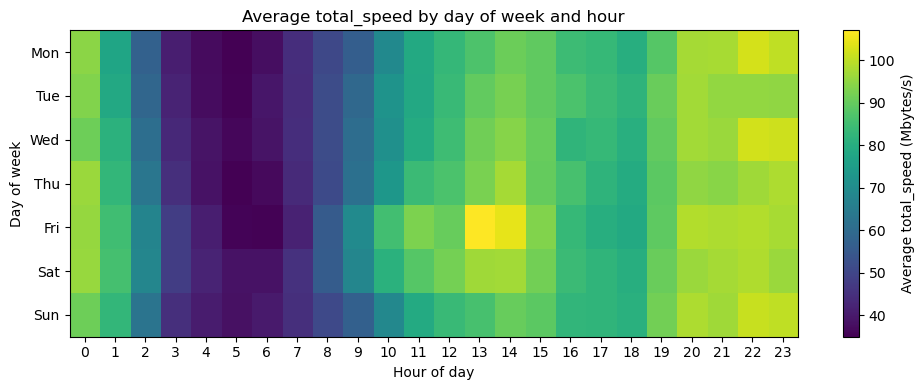

In [34]:
plt.figure(figsize=(10, 4))
pivot_scaled = pivot_dow_hour / 1e6
plt.imshow(pivot_scaled, aspect="auto")
plt.colorbar(label="Average total_speed (Mbytes/s)")
plt.xlabel("Hour of day")
plt.ylabel("Day of week")
plt.title("Average total_speed by day of week and hour")
plt.xticks(range(0, 24))
plt.yticks(
    range(7),
    ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
)
plt.tight_layout()
plt.show()

<h3>3.8: Summary </h3>

- **Global behaviour**
  - Over the full 6-month period the total traffic speed fluctuates between roughly 30–120 MBytes/s, with a very clear daily oscillation (regular peaks and troughs each day).
  - The overall level of traffic is fairly stable across months, but there are a few sharp drops towards zero, which are strong candidates for outages or downtime events.

- **Hour-of-day pattern**
  - When averaging over all days, traffic is lowest around 04:00–06:00, where the mean speed drops to about 35–40 MBytes/s.
  - From the early morning onwards, traffic gradually increases and reaches two main peaks:
    - a daytime peak around 13:00–15:00, and  
    - an evening peak around 20:00–23:00, where average speed approaches 100 MBytes/s.
  - This suggests a typical usage pattern with minimal activity at night, high activity after working hours, and another strong peak in the late evening.

- **Day-of-week pattern**
    - All weekdays (Sun–Thu) have broadly similar average traffic, with Monday showing the lowest mean speed (≈ 73–74 MBytes/s).
    - Friday, which is part of the weekend, actually has the highest average load (≈ 78 MBytes/s).
    - Saturday is only slightly below Friday (Maybe because it's not a day off for all).
  - This indicates that the network is heavily used even on weekends, particularly on Friday.

- **Distribution of total speed**
  - The histogram of `total_speed` (in MBytes/s) is right-skewed and appears multi-modal:
    - One concentration of values in the 30–60 MBytes/s range, and  
    - A dominant cluster in the 70–110 MBytes/s range.
  - A small number of very low values (near zero) correspond to periods of downtime or extremely low traffic.

- **Joint day–hour pattern**
  - The day-by-hour heatmap shows that:
    - Very low speeds occur on all days between roughly 03:00 and 06:00.
    - High speeds (≥ 90–100 MBytes/s) are concentrated around midday to afternoon (≈ 11:00–15:00) and evening hours (≈ 19:00–23:00).
    - Friday in particular shows very bright cells around midday and evening, confirming that weekend usage is intense, not quiet.
  - Overall, the time-of-day effect is stronger than the weekday/weekend effect: the same hours tend to be busy on both working days and weekends.

- **Correlations between numeric features**
  - `total_speed` is very strongly positively correlated with:
    - `total_volume`, `in_speed`, `out_speed`, `in_volume`, and `out_volume`.
    - This is expected since all of these measure different aspects of the same traffic flow.
  - `downtime` shows a weak negative correlation with traffic (higher downtime associated with slightly lower speeds).
  - `coverage` is weakly positively correlated with speeds and volumes, consistent with better coverage during periods of higher activity.
  - These correlations justify using the various speed/volume metrics as features for forecasting `total_speed`, while `downtime` and `coverage` provide additional contextual information.

Overall, we can conclude that the dataset has strong and regular daily patterns. These characteristics will be important for both forecasting and anomaly detection in later phases.

<h2>4: Feauture Engineering and Dataset Prepartion </h2>

<h3>4.1: Checking the Dataset </h3>

In [35]:
print("df shape:", df.shape)
df.head()

df shape: (4416, 11)


,timestamp,total_volume,total_speed,in_volume,in_speed,out_volume,out_speed,downtime,coverage,hour,dayofweek
0,2025-02-28 23:00:00,3.390000e+11,94067760.37,3.583060e+10,9931701.854,3.040000e+11,84136058.51,0.0,10000.0,23,4
1,2025-03-01 00:00:00,3.170000e+11,87965368.47,3.458317e+10,9607210.576,2.820000e+11,78358157.90,0.0,9999.0,0,5
2,2025-03-01 01:00:00,2.810000e+11,78180405.69,3.067573e+10,8521770.157,2.510000e+11,69658635.54,0.0,9999.0,1,5
3,2025-03-01 02:00:00,2.250000e+11,62407169.45,2.411162e+10,6698248.380,2.010000e+11,55708921.07,0.0,9999.0,2,5
4,2025-03-01 03:00:00,1.730000e+11,48121314.89,2.314486e+10,6429609.299,1.500000e+11,41691705.60,0.0,9999.0,3,5


<h3>4.2: Calender features: weekend and working hours (local context)</h3>

In [36]:
df["is_weekend"] = df["dayofweek"].isin([4, 5]).astype(int)
df["is_working_hour"] = df["hour"].between(8, 13).astype(int)
df[["timestamp", "dayofweek", "hour", "is_weekend", "is_working_hour"]].head(10)

,timestamp,dayofweek,hour,is_weekend,is_working_hour
0,2025-02-28 23:00:00,4,23,1,0
1,2025-03-01 00:00:00,5,0,1,0
2,2025-03-01 01:00:00,5,1,1,0
3,2025-03-01 02:00:00,5,2,1,0
4,2025-03-01 03:00:00,5,3,1,0
5,2025-03-01 04:00:00,5,4,1,0
6,2025-03-01 05:00:00,5,5,1,0
7,2025-03-01 06:00:00,5,6,1,0
8,2025-03-01 07:00:00,5,7,1,0
9,2025-03-01 08:00:00,5,8,1,1


<h3>4.3: Lag features for total_speed</h3>

In [37]:
lag_hours = [1, 2, 3, 6, 24]
for h in lag_hours:
    df[f"total_speed_lag_{h}"] = df["total_speed"].shift(h)
    
df[[c for c in df.columns if "total_speed" in c]].head(30)

,total_speed,total_speed_lag_1,total_speed_lag_2,total_speed_lag_3,total_speed_lag_6,total_speed_lag_24
0,94067760.37,NaN,NaN,NaN,NaN,NaN
1,87965368.47,94067760.37,NaN,NaN,NaN,NaN
2,78180405.69,87965368.47,94067760.37,NaN,NaN,NaN
3,62407169.45,78180405.69,87965368.47,94067760.37,NaN,NaN
4,48121314.89,62407169.45,78180405.69,87965368.47,NaN,NaN
5,44882324.31,48121314.89,62407169.45,78180405.69,NaN,NaN
6,38989062.37,44882324.31,48121314.89,62407169.45,94067760.37,NaN
7,38669879.82,38989062.37,44882324.31,48121314.89,87965368.47,NaN
8,43757835.71,38669879.82,38989062.37,44882324.31,78180405.69,NaN
9,57571793.16,43757835.71,38669879.82,38989062.37,62407169.45,NaN


<h3>4.4: Rolling averages </h3>

In [38]:
df["total_speed_rollmean_3"] = (
    df["total_speed"].shift(1).rolling(window=3).mean()
    )

df["total_speed_rollmean_6"] = (
    df["total_speed"].shift(1).rolling(window=6).mean()
    )

df[["timestamp", "total_speed", "total_speed_rollmean_3", "total_speed_rollmean_6"]].head(15)

,timestamp,total_speed,total_speed_rollmean_3,total_speed_rollmean_6
0,2025-02-28 23:00:00,94067760.37,NaN,NaN
1,2025-03-01 00:00:00,87965368.47,NaN,NaN
2,2025-03-01 01:00:00,78180405.69,NaN,NaN
3,2025-03-01 02:00:00,62407169.45,8.673784e+07,NaN
4,2025-03-01 03:00:00,48121314.89,7.618431e+07,NaN
5,2025-03-01 04:00:00,44882324.31,6.290296e+07,NaN
6,2025-03-01 05:00:00,38989062.37,5.180360e+07,6.927072e+07
7,2025-03-01 06:00:00,38669879.82,4.399757e+07,6.009094e+07
8,2025-03-01 07:00:00,43757835.71,4.084709e+07,5.187503e+07
9,2025-03-01 08:00:00,57571793.16,4.047226e+07,4.613793e+07


<h3>4.5: Define next hour prediction target (regression)</h3>

In [39]:
df["target_next_total_speed"] = df["total_speed"].shift(-1)

df[["timestamp", "total_speed", "target_next_total_speed"]].head(10)

,timestamp,total_speed,target_next_total_speed
0,2025-02-28 23:00:00,94067760.37,87965368.47
1,2025-03-01 00:00:00,87965368.47,78180405.69
2,2025-03-01 01:00:00,78180405.69,62407169.45
3,2025-03-01 02:00:00,62407169.45,48121314.89
4,2025-03-01 03:00:00,48121314.89,44882324.31
5,2025-03-01 04:00:00,44882324.31,38989062.37
6,2025-03-01 05:00:00,38989062.37,38669879.82
7,2025-03-01 06:00:00,38669879.82,43757835.71
8,2025-03-01 07:00:00,43757835.71,57571793.16
9,2025-03-01 08:00:00,57571793.16,72450622.40


In [40]:
df[["timestamp", "total_speed", "target_next_total_speed"]].tail(10)

,timestamp,total_speed,target_next_total_speed
4406,2025-08-31 13:00:00,8.036184e+07,7.810834e+07
4407,2025-08-31 14:00:00,7.810834e+07,7.078998e+07
4408,2025-08-31 15:00:00,7.078998e+07,6.404283e+07
4409,2025-08-31 16:00:00,6.404283e+07,7.550184e+07
4410,2025-08-31 17:00:00,7.550184e+07,8.944208e+07
4411,2025-08-31 18:00:00,8.944208e+07,1.143365e+08
4412,2025-08-31 19:00:00,1.143365e+08,1.089858e+08
4413,2025-08-31 20:00:00,1.089858e+08,8.790941e+07
4414,2025-08-31 21:00:00,8.790941e+07,8.736367e+07
4415,2025-08-31 22:00:00,8.736367e+07,NaN


<h3>4.6: Build modelling dataframe and drop NaNs</h3>

In [41]:
feature_cols_tree = [
    "total_speed",
    "total_volume",
    "in_speed",
    "out_speed",
    "in_volume",
    "out_volume",
    "downtime",
    "coverage",
    
    "hour",
    "dayofweek",
    "is_weekend",
    "is_working_hour",
    
    "total_speed_lag_1",
    "total_speed_lag_2",
    "total_speed_lag_3",
    "total_speed_lag_6",
    "total_speed_lag_24",
    
    "total_speed_rollmean_3",
    "total_speed_rollmean_6",
]

target_reg_col = "target_next_total_speed"

modelling_cols = ["timestamp"] + feature_cols_tree + [target_reg_col]

df_ml = df[modelling_cols].copy()

before_rows = len(df_ml)
df_ml = df_ml.dropna(subset=feature_cols_tree + [target_reg_col])
after_rows = len(df_ml)

print("Rows before dropping NaNs:", before_rows)
print("Rows after  dropping NaNs:", after_rows)
print("Rows removed:", before_rows - after_rows)

df_ml.head()

Rows before dropping NaNs: 4416
Rows after  dropping NaNs: 4391
Rows removed: 25


,timestamp,total_speed,total_volume,in_speed,out_speed,in_volume,out_volume,downtime,coverage,hour,dayofweek,is_weekend,is_working_hour,total_speed_lag_1,total_speed_lag_2,total_speed_lag_3,total_speed_lag_6,total_speed_lag_24,total_speed_rollmean_3,total_speed_rollmean_6,target_next_total_speed
24,2025-03-01 23:00:00,95302645.16,3.430000e+11,9397746.444,85904898.71,3.382954e+10,3.090000e+11,0.0,9999.0,23,5,1,0,94044561.50,92380242.61,85692795.73,64167917.20,94067760.37,9.070587e+07,8.445067e+07,93584872.06
25,2025-03-02 00:00:00,93584872.06,3.370000e+11,9293472.222,84291399.84,3.345418e+10,3.030000e+11,0.0,9999.0,0,6,0,0,95302645.16,94044561.50,92380242.61,77995359.59,87965368.47,9.390915e+07,8.963979e+07,85257150.90
26,2025-03-02 01:00:00,85257150.90,3.070000e+11,8158607.188,77098543.71,2.936886e+10,2.780000e+11,0.0,9999.0,1,6,0,0,93584872.06,95302645.16,94044561.50,92423148.02,78180405.69,9.431069e+07,9.223804e+07,72063611.30
27,2025-03-02 02:00:00,72063611.30,2.590000e+11,7395358.476,64668252.83,2.662129e+10,2.330000e+11,0.0,9999.0,2,6,0,0,85257150.90,93584872.06,95302645.16,85692795.73,62407169.45,9.138156e+07,9.104371e+07,59381694.59
28,2025-03-02 03:00:00,59381694.59,2.140000e+11,6413470.501,52968224.09,2.308676e+10,1.910000e+11,0.0,9999.0,3,6,0,0,72063611.30,85257150.90,93584872.06,92380242.61,48121314.89,8.363521e+07,8.877218e+07,49371401.80


In [42]:
df_ml = df_ml.reset_index(drop=True)
df_ml.head()

,timestamp,total_speed,total_volume,in_speed,out_speed,in_volume,out_volume,downtime,coverage,hour,dayofweek,is_weekend,is_working_hour,total_speed_lag_1,total_speed_lag_2,total_speed_lag_3,total_speed_lag_6,total_speed_lag_24,total_speed_rollmean_3,total_speed_rollmean_6,target_next_total_speed
0,2025-03-01 23:00:00,95302645.16,3.430000e+11,9397746.444,85904898.71,3.382954e+10,3.090000e+11,0.0,9999.0,23,5,1,0,94044561.50,92380242.61,85692795.73,64167917.20,94067760.37,9.070587e+07,8.445067e+07,93584872.06
1,2025-03-02 00:00:00,93584872.06,3.370000e+11,9293472.222,84291399.84,3.345418e+10,3.030000e+11,0.0,9999.0,0,6,0,0,95302645.16,94044561.50,92380242.61,77995359.59,87965368.47,9.390915e+07,8.963979e+07,85257150.90
2,2025-03-02 01:00:00,85257150.90,3.070000e+11,8158607.188,77098543.71,2.936886e+10,2.780000e+11,0.0,9999.0,1,6,0,0,93584872.06,95302645.16,94044561.50,92423148.02,78180405.69,9.431069e+07,9.223804e+07,72063611.30
3,2025-03-02 02:00:00,72063611.30,2.590000e+11,7395358.476,64668252.83,2.662129e+10,2.330000e+11,0.0,9999.0,2,6,0,0,85257150.90,93584872.06,95302645.16,85692795.73,62407169.45,9.138156e+07,9.104371e+07,59381694.59
4,2025-03-02 03:00:00,59381694.59,2.140000e+11,6413470.501,52968224.09,2.308676e+10,1.910000e+11,0.0,9999.0,3,6,0,0,72063611.30,85257150.90,93584872.06,92380242.61,48121314.89,8.363521e+07,8.877218e+07,49371401.80


<h3>5.7: Time-based train/val/test split (for regression)</h3>

In [43]:
n = len(df_ml)
train_end = int(n*0.7)
val_end = int(n*0.85)

print("Total samples:", n)
print("Train end index:", train_end)
print("Val end index:", val_end)

X_all = df_ml[feature_cols_tree]
y_all_reg = df_ml[target_reg_col]

X_train_reg = X_all.iloc[:train_end]
y_train_reg = y_all_reg.iloc[:train_end]

X_val_reg = X_all.iloc[train_end:val_end]
y_val_reg = y_all_reg.iloc[train_end:val_end]

X_test_reg = X_all.iloc[val_end:]
y_test_reg = y_all_reg.iloc[val_end:]

print("Train shape (reg):", X_train_reg.shape, y_train_reg.shape)
print("Val shape (reg):  ", X_val_reg.shape, y_val_reg.shape)
print("Test shape (reg): ", X_test_reg.shape, y_test_reg.shape)

print("\nTrain period:", df_ml["timestamp"].iloc[0], "→", df_ml["timestamp"].iloc[train_end-1])
print("Val period:  ", df_ml["timestamp"].iloc[train_end], "→", df_ml["timestamp"].iloc[val_end-1])
print("Test period: ", df_ml["timestamp"].iloc[val_end], "→", df_ml["timestamp"].iloc[-1])

Total samples: 4391
Train end index: 3073
Val end index: 3732
Train shape (reg): (3073, 19) (3073,)
Val shape (reg):   (659, 19) (659,)
Test shape (reg):  (659, 19) (659,)

Train period: 2025-03-01 23:00:00 → 2025-07-07 23:00:00
Val period:   2025-07-08 00:00:00 → 2025-08-04 10:00:00
Test period:  2025-08-04 11:00:00 → 2025-08-31 21:00:00


<h3>4.8: Heavy-load classification label</h3>

In [44]:
heavy_threshold = y_all_reg.iloc[:train_end].quantile(0.9)
print("Heavy-load threshold (Mbytes/sec):", heavy_threshold/1e6)

df_ml["y_heavy"] = (df_ml[target_reg_col] >= heavy_threshold).astype(int)

print("Class balance (overall):")
print(df_ml["y_heavy"].value_counts())
print(df_ml["y_heavy"].value_counts(normalize=True))

y_all_clf = df_ml["y_heavy"]

y_train_clf = y_all_clf.iloc[:train_end]
y_val_clf = y_all_clf.iloc[train_end:val_end]
y_test_clf = y_all_clf.iloc[val_end:]

print("Train shape (clf):", X_train_reg.shape, y_train_clf.shape)
print("Val shape (clf):  ", X_val_reg.shape, y_val_clf.shape)
print("Test shape (clf): ", X_test_reg.shape, y_test_clf.shape)

Heavy-load threshold (Mbytes/sec): 106.56355010000001
Class balance (overall):
y_heavy
0    3942
1     449
Name: count, dtype: int64
y_heavy
0    0.897745
1    0.102255
Name: proportion, dtype: float64
Train shape (clf): (3073, 19) (3073,)
Val shape (clf):   (659, 19) (659,)
Test shape (clf):  (659, 19) (659,)


<h3>4.9: Feature set for linear vs. tree models</h3>

In [45]:
feature_cols_linear = [
    "hour",
    "dayofweek",
    "is_weekend",
    "is_working_hour",
    "total_speed",
    "total_speed_lag_1",
    "total_speed_lag_2",
    "total_speed_lag_3",
    "total_speed_lag_6",
    "total_speed_lag_24",
    "total_speed_rollmean_3",
    "total_speed_rollmean_6",
]

print("Number of features (linear):", len(feature_cols_linear))
print("Number of features (tree):  ", len(feature_cols_tree))

Number of features (linear): 12
Number of features (tree):   19


<h3>4.10: Summary</h3>

- Added calendar features capturing local behaviour:
  - `is_weekend` for the Friday–Saturday weekend.
  - `is_working_hour` for the typical work/school window (≈ 08:00–13:00).
- Engineered time-series features for `total_speed`:
  - Lagged values at 1, 2, 3, 6, and 24 hours.
  - Rolling means over the previous 3 and 6 hours.
- Defined the regression target as the next-hour total speed (`target_next_total_speed`).
- Constructed a clean supervised dataset `df_ml` and applied a time-based split
  into train (70%), validation (15%), and test (15%) sets.
- Defined a heavy-load classification label (`y_heavy`) using a 90th percentile
  threshold derived from the training set, enabling a second task:
  “Will the link be heavily loaded next hour?”
- Created two feature sets:
  - `feature_cols_linear`: a compact, less-correlated set for linear models.
  - `feature_cols_tree`: a richer set including additional traffic features for tree-based models.


<h2>5: Training Baseline Models</h2>

<h3>5.1: Helper Functions and Naive baseline (regression)</h3>

In [46]:
def regression_metrics(y_true, y_pred, prefix=""):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{prefix}MAE : {mae:,.2f}")
    print(f"{prefix}RMSE: {rmse:,.2f}")
    print(f"{prefix}R²  : {r2:,.4f}")
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

def clf_metrics(y_true, y_pred, prefix=""):
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, labels=[0, 1], zero_division=0
    )
    
    print(f"{prefix}Accuracy        : {acc:.4f}")
    print(f"{prefix}Precision (heavy): {precision[1]:.4f}")
    print(f"{prefix}Recall (heavy)   : {recall[1]:.4f}")
    print(f"{prefix}F1 (heavy)       : {f1[1]:.4f}")
    return {
        "acc": acc,
        "prec_heavy": precision[1],
        "rec_heavy": recall[1],
        "f1_heavy": f1[1],
    }

y_val_naive = X_val_reg["total_speed_lag_1"]
y_test_naive = X_test_reg["total_speed_lag_1"]

print("Naive baseline – validation:")
naive_val_metrics = regression_metrics(y_val_reg, y_val_naive, prefix="  ")

print("\nNaive baseline – test:")
naive_test_metrics = regression_metrics(y_test_reg, y_test_naive, prefix="  ")

Naive baseline – validation:
  MAE : 19,585,449.18
  RMSE: 24,625,609.87
  R²  : 0.2358

Naive baseline – test:
  MAE : 19,656,413.14
  RMSE: 24,377,808.22
  R²  : 0.2135


<h3>5.2: Scaling features for linear models</h3>

In [47]:
scaler_linear = StandardScaler()

X_train_reg_linear = X_train_reg[feature_cols_linear]
X_val_reg_linear   = X_val_reg[feature_cols_linear]
X_test_reg_linear  = X_test_reg[feature_cols_linear]

X_train_reg_lin_scaled = scaler_linear.fit_transform(X_train_reg_linear)
X_val_reg_lin_scaled   = scaler_linear.transform(X_val_reg_linear)
X_test_reg_lin_scaled  = scaler_linear.transform(X_test_reg_linear)

print("Shapes (train/val/test) for linear features:")
print(X_train_reg_lin_scaled.shape, X_val_reg_lin_scaled.shape, X_test_reg_lin_scaled.shape)

Shapes (train/val/test) for linear features:
(3073, 12) (659, 12) (659, 12)


<h3>5.3A: Linear Regression </h3>

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_lin_scaled, y_train_reg)

print("Linear Regression – validation:")
y_val_lin = lin_reg.predict(X_val_reg_lin_scaled)
lin_val_metrics = regression_metrics(y_val_reg, y_val_lin, prefix="  ")

print("Linear Regression – test:")
y_test_lin = lin_reg.predict(X_test_reg_lin_scaled)
lin_test_metrics = regression_metrics(y_test_reg, y_test_lin, prefix="  ")

Linear Regression – validation:
  MAE : 8,617,975.53
  RMSE: 13,259,597.90
  R²  : 0.7785
Linear Regression – test:
  MAE : 7,441,363.28
  RMSE: 10,497,986.08
  R²  : 0.8542


<h3>5.3B: Ridge Regression and Different Alpha Values</h3>

In [49]:
alphas = [0.01, 0.1, 1, 10, 20, 100]
alpha_results = {}

for a in alphas:
    print(f"\nAlpha = {a}")
    
    ridge_reg = Ridge(alpha=a)
    ridge_reg.fit(X_train_reg_lin_scaled, y_train_reg)
    
    print("\nRidge Regression – validation:")
    y_val_ridge = ridge_reg.predict(X_val_reg_lin_scaled)
    ridge_val_metrics = regression_metrics(y_val_reg, y_val_ridge, prefix="  ")
    alpha_results[a] = ridge_val_metrics["RMSE"]

    print("\nRidge Regression – test:")
    y_test_ridge = ridge_reg.predict(X_test_reg_lin_scaled)
    ridge_test_metrics = regression_metrics(y_test_reg, y_test_ridge, prefix="  ")
    
best_alpha = min(alpha_results, key=alpha_results.get)
print("\nBest alpha based on validation RMSE:", best_alpha)

ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X_train_reg_lin_scaled, y_train_reg)

print("\nRidge Regression (best alpha) – validation:")
y_val_ridge = ridge_reg.predict(X_val_reg_lin_scaled)
ridge_val_metrics = regression_metrics(y_val_reg, y_val_ridge, prefix="  ")

print("\nRidge Regression (best alpha) – test:")
y_test_ridge = ridge_reg.predict(X_test_reg_lin_scaled)
ridge_test_metrics = regression_metrics(y_test_reg, y_test_ridge, prefix="  ")


Alpha = 0.01

Ridge Regression – validation:
  MAE : 8,618,007.10
  RMSE: 13,259,555.58
  R²  : 0.7785

Ridge Regression – test:
  MAE : 7,441,442.18
  RMSE: 10,498,047.07
  R²  : 0.8541

Alpha = 0.1

Ridge Regression – validation:
  MAE : 8,618,291.00
  RMSE: 13,259,175.99
  R²  : 0.7785

Ridge Regression – test:
  MAE : 7,442,151.16
  RMSE: 10,498,595.84
  R²  : 0.8541

Alpha = 1

Ridge Regression – validation:
  MAE : 8,621,106.83
  RMSE: 13,255,506.43
  R²  : 0.7786

Ridge Regression – test:
  MAE : 7,449,264.19
  RMSE: 10,504,074.02
  R²  : 0.8540

Alpha = 10

Ridge Regression – validation:
  MAE : 8,649,941.86
  RMSE: 13,229,287.77
  R²  : 0.7795

Ridge Regression – test:
  MAE : 7,517,972.82
  RMSE: 10,558,125.24
  R²  : 0.8525

Alpha = 20

Ridge Regression – validation:
  MAE : 8,688,890.23
  RMSE: 13,216,977.73
  R²  : 0.7799

Ridge Regression – test:
  MAE : 7,593,663.80
  RMSE: 10,617,405.77
  R²  : 0.8508

Alpha = 100

Ridge Regression – validation:
  MAE : 9,080,331.56
  

<h3>5.4: logistic Regression (heavy-load classification)</h3>

In [50]:
X_train_clf_linear = X_train_reg[feature_cols_linear]
X_val_clf_linear   = X_val_reg[feature_cols_linear]
X_test_clf_linear  = X_test_reg[feature_cols_linear]

X_train_clf_lin_scaled = scaler_linear.transform(X_train_clf_linear)
X_val_clf_lin_scaled   = scaler_linear.transform(X_val_clf_linear)
X_test_clf_lin_scaled  = scaler_linear.transform(X_test_clf_linear)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf_lin_scaled, y_train_clf)

print("\nLogistic Regression – validation:")
y_val_clf_pred = log_reg.predict(X_val_clf_lin_scaled)
log_val_metrics = clf_metrics(y_val_clf, y_val_clf_pred, prefix="  ")
print("\nConfusion matrix (val):")
print(confusion_matrix(y_val_clf, y_val_clf_pred))

print("\nLogistic Regression – test:")
y_test_clf_pred = log_reg.predict(X_test_clf_lin_scaled)
log_test_metrics = clf_metrics(y_test_clf, y_test_clf_pred, prefix="  ")
print("\nConfusion matrix (test):")
print(confusion_matrix(y_test_clf, y_test_clf_pred))


Logistic Regression – validation:
  Accuracy        : 0.9287
  Precision (heavy): 0.6129
  Recall (heavy)   : 0.3519
  F1 (heavy)       : 0.4471

Confusion matrix (val):
[[593  12]
 [ 35  19]]

Logistic Regression – test:
  Accuracy        : 0.8907
  Precision (heavy): 0.6596
  Recall (heavy)   : 0.3563
  F1 (heavy)       : 0.4627

Confusion matrix (test):
[[556  16]
 [ 56  31]]


<h3>5.5: Collect Metrics into Tables</h3>

In [51]:
reg_results = pd.DataFrame([
    {"model": "Naive",  "dataset": "val",  **naive_val_metrics},
    {"model": "Naive",  "dataset": "test", **naive_test_metrics},
    {"model": "Linear", "dataset": "val",  **lin_val_metrics},
    {"model": "Linear", "dataset": "test", **lin_test_metrics},
    {"model": "Ridge",  "dataset": "val",  **ridge_val_metrics},
    {"model": "Ridge",  "dataset": "test", **ridge_test_metrics},
])

clf_results = pd.DataFrame([
    {"model": "Logistic", "dataset": "val",  **log_val_metrics},
    {"model": "Logistic", "dataset": "test", **log_test_metrics},
])

print("\nRegression results:")
print(reg_results)

print("\nClassification results:")
print(clf_results)


Regression results:
    model dataset           MAE          RMSE        R2
0   Naive     val  1.958545e+07  2.462561e+07  0.235848
1   Naive    test  1.965641e+07  2.437781e+07  0.213535
2  Linear     val  8.617976e+06  1.325960e+07  0.778453
3  Linear    test  7.441363e+06  1.049799e+07  0.854151
4   Ridge     val  8.688890e+06  1.321698e+07  0.779875
5   Ridge    test  7.593664e+06  1.061741e+07  0.850814

Classification results:
      model dataset       acc  prec_heavy  rec_heavy  f1_heavy
0  Logistic     val  0.928680    0.612903   0.351852  0.447059
1  Logistic    test  0.890744    0.659574   0.356322  0.462687


<h3>5.6: Time-series slice: actual vs. naive vs. linear vs. ridge</h3>

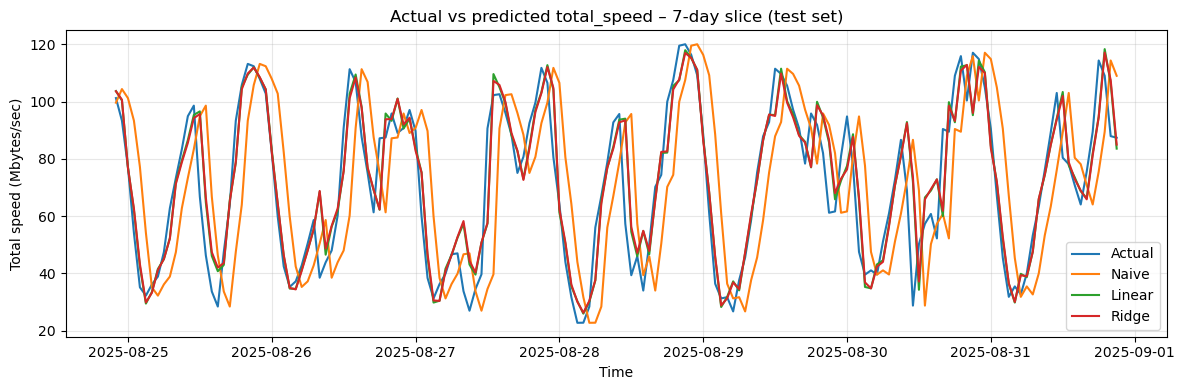

In [52]:
timestamps_test = df_ml["timestamp"].iloc[val_end:]
df_reg_test_preds = pd.DataFrame({
    "timestamp": timestamps_test.values,
    "y_true":   y_test_reg.values,
    "y_naive":  y_test_naive.values,
    "y_linear": y_test_lin,
    "y_ridge":  y_test_ridge,
})

N = 24 * 7
df_slice = df_reg_test_preds.tail(N)

plt.figure(figsize=(12, 4))
plt.plot(df_slice["timestamp"], df_slice["y_true"]   / 1e6, label="Actual")
plt.plot(df_slice["timestamp"], df_slice["y_naive"]  / 1e6, label="Naive")
plt.plot(df_slice["timestamp"], df_slice["y_linear"] / 1e6, label="Linear")
plt.plot(df_slice["timestamp"], df_slice["y_ridge"]  / 1e6, label="Ridge")

plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/sec)")
plt.title("Actual vs predicted total_speed – 7-day slice (test set)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

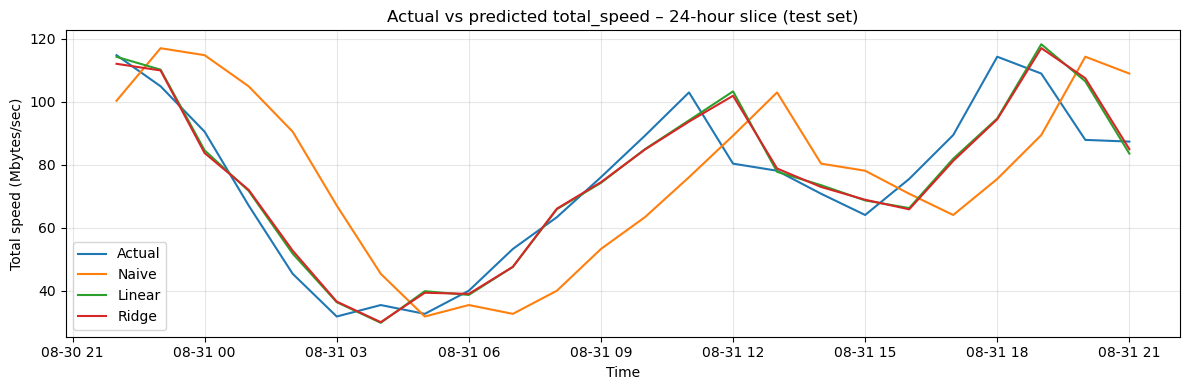

In [53]:
N = 24
df_slice = df_reg_test_preds.tail(N)

plt.figure(figsize=(12, 4))
plt.plot(df_slice["timestamp"], df_slice["y_true"]   / 1e6, label="Actual")
plt.plot(df_slice["timestamp"], df_slice["y_naive"]  / 1e6, label="Naive")
plt.plot(df_slice["timestamp"], df_slice["y_linear"] / 1e6, label="Linear")
plt.plot(df_slice["timestamp"], df_slice["y_ridge"]  / 1e6, label="Ridge")

plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/sec)")
plt.title("Actual vs predicted total_speed – 24-hour slice (test set)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<h3>5.7: actual vs. predicted scatter and ideal line (test set)</h3>

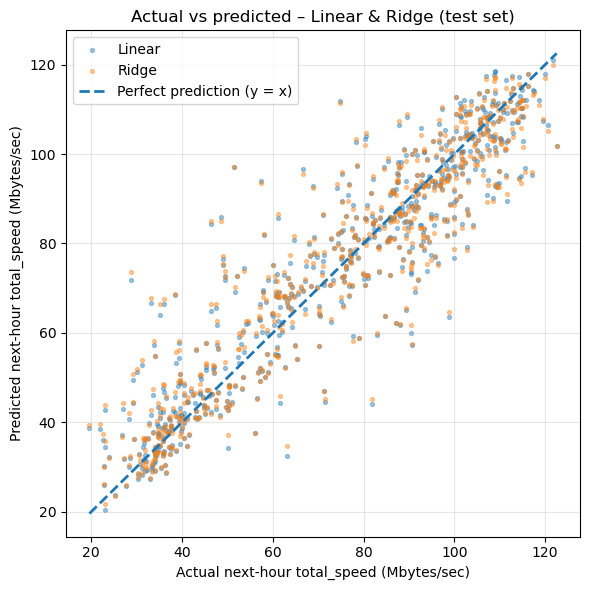

In [54]:
y_true_test = y_test_reg.values
y_pred_lin_test = y_test_lin
y_pred_ridge_test = y_test_ridge

scale = 1e6 
y_true_scaled  = y_true_test      / scale
y_lin_scaled   = y_pred_lin_test  / scale
y_ridge_scaled = y_pred_ridge_test / scale

max_val = max(y_true_scaled.max(), y_lin_scaled.max(), y_ridge_scaled.max())
min_val = min(y_true_scaled.min(), y_lin_scaled.min(), y_ridge_scaled.min())
line = np.linspace(min_val, max_val, 200)

plt.figure(figsize=(6, 6))
plt.scatter(y_true_scaled, y_lin_scaled,   s=8, alpha=0.4, label="Linear")
plt.scatter(y_true_scaled, y_ridge_scaled, s=8, alpha=0.4, label="Ridge")

plt.plot(line, line, linestyle="--", linewidth=2, label="Perfect prediction (y = x)")

plt.xlabel("Actual next-hour total_speed (Mbytes/sec)")
plt.ylabel("Predicted next-hour total_speed (Mbytes/sec)")
plt.title("Actual vs predicted – Linear & Ridge (test set)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<h3>5.8: Residuals vs. predicted (linear and ridge, test set)</h3>

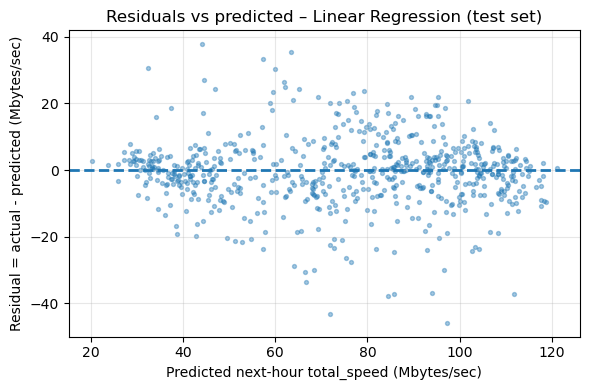

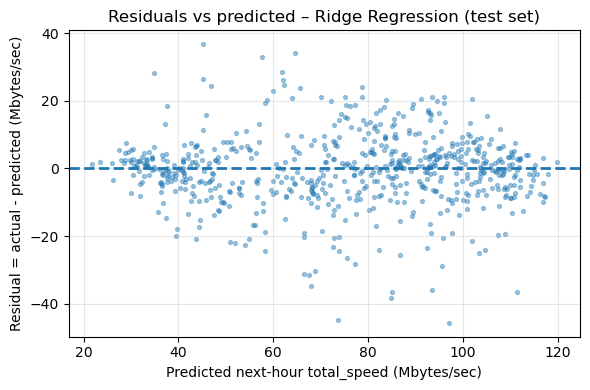

In [55]:
res_lin   = (y_true_test - y_pred_lin_test)   / scale
res_ridge = (y_true_test - y_pred_ridge_test) / scale

plt.figure(figsize=(6, 4))
plt.scatter(y_lin_scaled, res_lin, s=8, alpha=0.4)
plt.axhline(0, linestyle="--", linewidth=2)
plt.xlabel("Predicted next-hour total_speed (Mbytes/sec)")
plt.ylabel("Residual = actual - predicted (Mbytes/sec)")
plt.title("Residuals vs predicted – Linear Regression (test set)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(y_ridge_scaled, res_ridge, s=8, alpha=0.4)
plt.axhline(0, linestyle="--", linewidth=2)
plt.xlabel("Predicted next-hour total_speed (Mbytes/sec)")
plt.ylabel("Residual = actual - predicted (Mbytes/sec)")
plt.title("Residuals vs predicted – Ridge Regression (test set)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<h3>5.9: Summary </h3>

In this phase we trained and evaluated three regression baselines  
(naive, Linear Regression, Ridge Regression) and one classification
model (Logistic Regression for heavy-load detection).  
The plots from this phase allow us to visually inspect how well the
linear models fit the data.

#### 1. Time-series comparison (7-day slice, test set)

The first plot shows the last 7 days of the test period, comparing:

- **Actual next-hour total_speed** (blue)
- **Naive baseline** (orange, “next hour = this hour”)
- **Linear Regression** (green)
- **Ridge Regression** (red)

Observations:

- All three models reproduce the strong daily pattern of the traffic.
- The naive model often lags behind sudden rises and drops:  
  it can overshoot after a peak and undershoot after a valley, because it
  simply copies the previous hour.
- Linear and Ridge curves lie much closer to the actual series and
  adapt faster to changes in level, especially around peaks and troughs.
- Ridge and Linear are visually almost identical, which is expected given
  that Ridge is just a regularised version of Linear Regression.

Overall, this plot shows that the linear models clearly improve on the
naive baseline in terms of tracking the real dynamics.

#### 2. Time-series comparison (24-hour zoom, test set)

The 24-hour zoom focuses on a single day in the test period.

- We can see in detail that the naive baseline tends to be too slow:
  when traffic is decreasing, it stays too high, when traffic starts to
  increase, it stays too low.
- Linear and Ridge follow the actual curve very closely during the
  whole day, capturing both the low-load hours and the high-load evening peak.
- Deviations between Linear and Ridge are very small, confirming that
  regularisation is not drastically changing the fit.

This zoomed view shows more clearly that the linear models are not just
getting the daily pattern right, but also predicting the magnitude of
each hour reasonably well.

#### 3. Actual vs predicted scatter (test set)

The scatter plot shows:

- x-axis: actual next-hour total_speed (Mbytes/sec)
- y-axis: predicted next-hour total_speed
- points for Linear and Ridge
- dashed line = perfect prediction (y = x)

Observations:

- The point cloud for both models is tightly clustered around the y = x
  line, which indicates good overall calibration.
- Across almost the whole range of traffic values (from ~20 to ~120
  Mbytes/sec), predictions stay relatively close to the ideal line.
- Ridge and Linear points almost overlap, again confirming that both
  models behave very similarly on this dataset.

In other words, the scatter plot shows that the linear models are making
numerically reasonable predictions, not just reproducing the mean.

#### 4. Residuals vs predicted (Linear & Ridge)

The residual plots show:

- x-axis: predicted next-hour total_speed (Mbytes/sec)
- y-axis: residual = actual − predicted

We look for patterns:

- For both Linear and Ridge, residuals are roughly centred around 0,
  with no obvious strong curvature. This suggests that a linear model is a
  reasonable first approximation of the relationship between features and
  the target.
- There is some spread that increases for mid-range values, and a few
  larger errors (both positive and negative), especially around some
  peaks. This is expected in a real network-traffic dataset: extreme
  spikes are inherently harder to predict.
- Residual patterns are very similar for Linear and Ridge, which confirms
  that regularisation mainly stabilises the coefficients but does not
  radically change the error structure.

These plots indicate that there is no strong, systematic bias in the
linear models, although there is still room to improve the prediction of
extreme loads (which motivates trying tree-based models later).

---

**Conclusion**

- The naive baseline provides a simple but clearly weaker reference,
  especially around rapid changes in traffic.
- Linear Regression and Ridge Regression both significantly improve
  on the naive model and track the hourly traffic very well, with
  predictions tightly clustered around the ideal y = x line.
- Ridge behaves almost identically to Linear, suggesting that
  regularisation is helpful for stability but the underlying linear
  structure already fits the data well.
- Residual analysis shows no major systematic error pattern, but some
  larger deviations at high-load periods, which motivates exploring more
  flexible models (Random Forest / Gradient Boosting) in the next phase.

This phase establishes a strong linear baseline for both forecasting
and heavy-load detection, against which we will compare the tree-based
models in the next phase and the overall model comparison in the final phase.


<h2>6: Tree Based Models </h2>

<h3>6.1: Prepare tree feature sets </h3>

In [56]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

X_train_reg_tree = X_train_reg[feature_cols_tree]
X_val_reg_tree   = X_val_reg[feature_cols_tree]
X_test_reg_tree  = X_test_reg[feature_cols_tree]

print("Tree feature shapes (regression):")
print("  Train:", X_train_reg_tree.shape)
print("  Val  :", X_val_reg_tree.shape)
print("  Test :", X_test_reg_tree.shape)

X_train_clf_tree = X_train_reg_tree.copy()
X_val_clf_tree   = X_val_reg_tree.copy()
X_test_clf_tree  = X_test_reg_tree.copy()

print("\nTree feature shapes (classification):")
print("  Train:", X_train_clf_tree.shape)
print("  Val  :", X_val_clf_tree.shape)
print("  Test :", X_test_clf_tree.shape)

Tree feature shapes (regression):
  Train: (3073, 19)
  Val  : (659, 19)
  Test : (659, 19)

Tree feature shapes (classification):
  Train: (3073, 19)
  Val  : (659, 19)
  Test : (659, 19)


<h3>6.2: Random Forest Regressor (next-hour total_speed)

In [57]:
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
)

rf_reg.fit(X_train_reg_tree, y_train_reg)

print("\nRandom Forest Regressor – validation:")
y_val_rf = rf_reg.predict(X_val_reg_tree)
rf_val_metrics = regression_metrics(y_val_reg, y_val_rf, prefix="  ")

print("\nRandom Forest Regressor – test:")
y_test_rf = rf_reg.predict(X_test_reg_tree)
rf_test_metrics = regression_metrics(y_test_reg, y_test_rf, prefix="  ")

rf_reg_rows = [
    {"model": "RF_Reg", "dataset": "val",  **rf_val_metrics},
    {"model": "RF_Reg", "dataset": "test", **rf_test_metrics},
]
reg_results = pd.concat([reg_results, pd.DataFrame(rf_reg_rows)], ignore_index=True)

print("\nUpdated regression results (including RF_Reg):")
print(reg_results)


Random Forest Regressor – validation:
  MAE : 8,561,526.26
  RMSE: 13,572,004.70
  R²  : 0.7679

Random Forest Regressor – test:
  MAE : 7,735,897.58
  RMSE: 11,687,130.76
  R²  : 0.8192

Updated regression results (including RF_Reg):
    model dataset           MAE          RMSE        R2
0   Naive     val  1.958545e+07  2.462561e+07  0.235848
1   Naive    test  1.965641e+07  2.437781e+07  0.213535
2  Linear     val  8.617976e+06  1.325960e+07  0.778453
3  Linear    test  7.441363e+06  1.049799e+07  0.854151
4   Ridge     val  8.688890e+06  1.321698e+07  0.779875
5   Ridge    test  7.593664e+06  1.061741e+07  0.850814
6  RF_Reg     val  8.561526e+06  1.357200e+07  0.767890
7  RF_Reg    test  7.735898e+06  1.168713e+07  0.819238


<h3>6.3: Random Forest Classifier (heavy-load detection)</h3>

In [58]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
)

rf_clf.fit(X_train_clf_tree, y_train_clf)

print("\nRandom Forest Classifier – validation:")
y_val_clf_rf = rf_clf.predict(X_val_clf_tree)
rf_clf_val_metrics = clf_metrics(y_val_clf, y_val_clf_rf, prefix="  ")
print("\nConfusion matrix (val):")
print(confusion_matrix(y_val_clf, y_val_clf_rf))

print("\nRandom Forest Classifier – test:")
y_test_clf_rf = rf_clf.predict(X_test_clf_tree)
rf_clf_test_metrics = clf_metrics(y_test_clf, y_test_clf_rf, prefix="  ")
print("\nConfusion matrix (test):")
print(confusion_matrix(y_test_clf, y_test_clf_rf))

rf_clf_rows = [
    {"model": "RF_Clf", "dataset": "val",  **rf_clf_val_metrics},
    {"model": "RF_Clf", "dataset": "test", **rf_clf_test_metrics},
]
clf_results = pd.concat([clf_results, pd.DataFrame(rf_clf_rows)], ignore_index=True)

print("\nUpdated classification results (including RF_Clf):")
print(clf_results)


Random Forest Classifier – validation:
  Accuracy        : 0.9196
  Precision (heavy): 0.5128
  Recall (heavy)   : 0.3704
  F1 (heavy)       : 0.4301

Confusion matrix (val):
[[586  19]
 [ 34  20]]

Random Forest Classifier – test:
  Accuracy        : 0.8998
  Precision (heavy): 0.6567
  Recall (heavy)   : 0.5057
  F1 (heavy)       : 0.5714

Confusion matrix (test):
[[549  23]
 [ 43  44]]

Updated classification results (including RF_Clf):
      model dataset       acc  prec_heavy  rec_heavy  f1_heavy
0  Logistic     val  0.928680    0.612903   0.351852  0.447059
1  Logistic    test  0.890744    0.659574   0.356322  0.462687
2    RF_Clf     val  0.919575    0.512821   0.370370  0.430108
3    RF_Clf    test  0.899848    0.656716   0.505747  0.571429


<h3>6.4: Time-Series slice: best linear vs. random forest </h3>

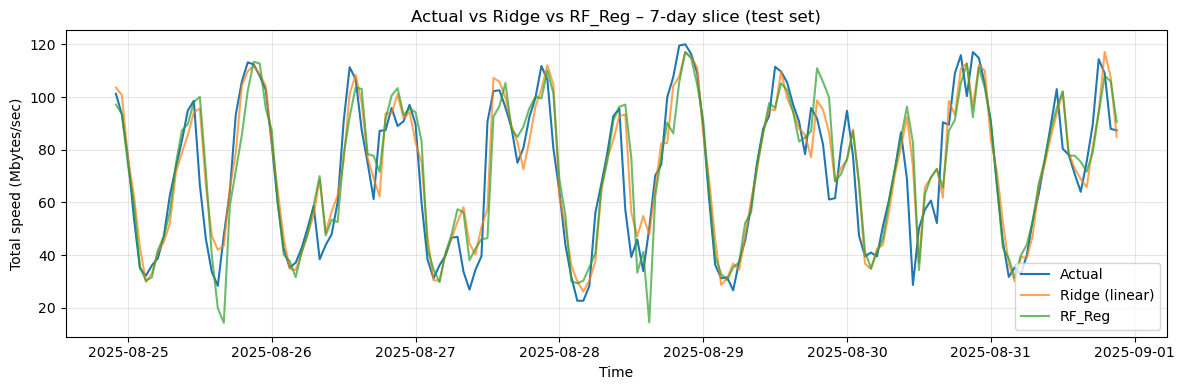

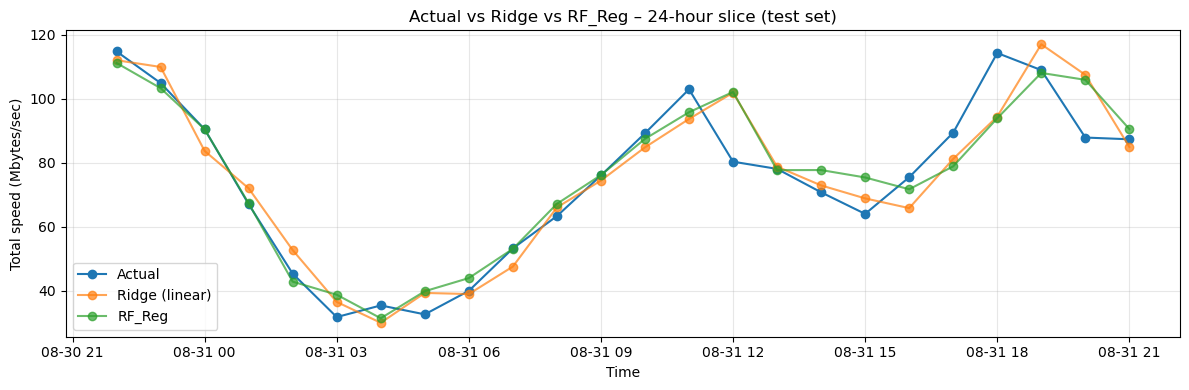

In [59]:
df_reg_test_preds["y_rf"] = y_test_rf

N = 24 * 7
df_slice2 = df_reg_test_preds.tail(N)

plt.figure(figsize=(12, 4))
plt.plot(df_slice2["timestamp"], df_slice2["y_true"]  / 1e6, label="Actual")
plt.plot(df_slice2["timestamp"], df_slice2["y_ridge"] / 1e6, label="Ridge (linear)", alpha=0.7)
plt.plot(df_slice2["timestamp"], df_slice2["y_rf"]    / 1e6, label="RF_Reg",       alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/sec)")
plt.title("Actual vs Ridge vs RF_Reg – 7-day slice (test set)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

df_day2 = df_slice2.tail(24)

plt.figure(figsize=(12, 4))
plt.plot(df_day2["timestamp"], df_day2["y_true"]  / 1e6, marker="o", label="Actual")
plt.plot(df_day2["timestamp"], df_day2["y_ridge"] / 1e6, marker="o", label="Ridge (linear)", alpha=0.7)
plt.plot(df_day2["timestamp"], df_day2["y_rf"]    / 1e6, marker="o", label="RF_Reg",       alpha=0.7)

plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/sec)")
plt.title("Actual vs Ridge vs RF_Reg – 24-hour slice (test set)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<h3> 6.5: Feature Importances</h3>

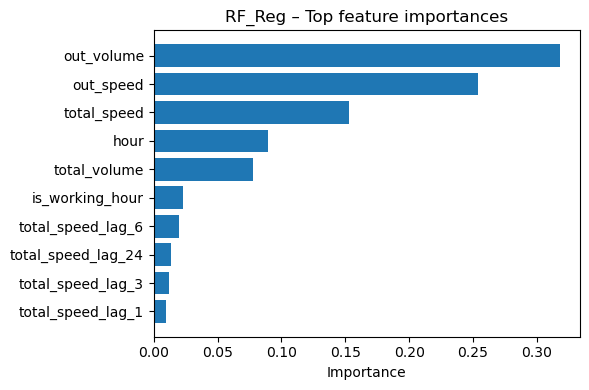

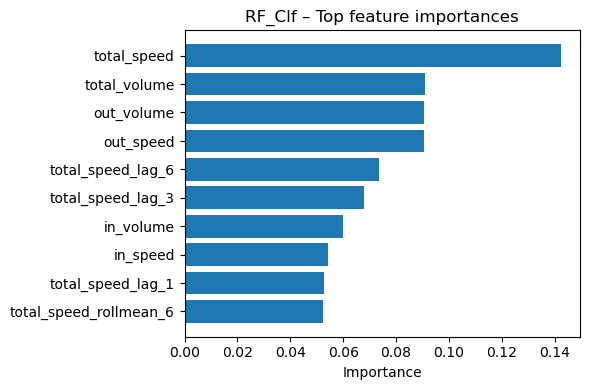

In [60]:
importances_reg = rf_reg.feature_importances_
indices_reg = np.argsort(importances_reg)[::-1]
top_n = min(10, len(feature_cols_tree)) 
top_features_reg = np.array(feature_cols_tree)[indices_reg[:top_n]]
top_importances_reg = importances_reg[indices_reg[:top_n]]

plt.figure(figsize=(6, 4))
plt.barh(top_features_reg[::-1], top_importances_reg[::-1])
plt.xlabel("Importance")
plt.title("RF_Reg – Top feature importances")
plt.tight_layout()
plt.show()

importances_clf = rf_clf.feature_importances_
indices_clf = np.argsort(importances_clf)[::-1]
top_features_clf = np.array(feature_cols_tree)[indices_clf[:top_n]]
top_importances_clf = importances_clf[indices_clf[:top_n]]

plt.figure(figsize=(6, 4))
plt.barh(top_features_clf[::-1], top_importances_clf[::-1])
plt.xlabel("Importance")
plt.title("RF_Clf – Top feature importances")
plt.tight_layout()
plt.show()

<h2>7: Residual-based anomaly detection </h2>

<h3>7.1: Compute training residual statistics (for thresholds) </h3>

In [89]:
y_train_pred_ridge = ridge_reg.predict(X_train_reg_lin_scaled)
train_residuals = y_train_reg - y_train_pred_ridge
res_mean = train_residuals.mean()
res_std  = train_residuals.std()
print("\nTraining residual statistics (Ridge):")
print(f"  Mean residual: {res_mean:.3f}")
print(f"  Std  residual: {res_std:.3f}")


Training residual statistics (Ridge):
  Mean residual: 0.000
  Std  residual: 8271599.909


In [96]:
print(res_mean)

6.2843816814925355e-09


In [90]:
k_sigma = 2.5
upper_threshold = res_mean + k_sigma * res_std
lower_threshold = res_mean - k_sigma * res_std

print(f"\nAnomaly thresholds (k = {k_sigma}):")
print(f"  Lower: {lower_threshold:.3f}")
print(f"  Upper: {upper_threshold:.3f}")


Anomaly thresholds (k = 2.5):
  Lower: -20678999.773
  Upper: 20678999.773


<h3>7.2: Build residual table for the TEST set </h3>

In [92]:
df_anom_test = df_reg_test_preds.copy()
df_anom_test["residual"] = df_anom_test["y_true"] - df_anom_test["y_ridge"]
df_anom_test["is_anomaly"] = (
    (df_anom_test["residual"] > upper_threshold) |
    (df_anom_test["residual"] < lower_threshold)
)

df_anom_test["anomaly_type"] = np.where(
    df_anom_test["residual"] > upper_threshold, "spike",
    np.where(
        df_anom_test["residual"] < lower_threshold, "drop",
        "normal"
    )
)
print("\nAnomaly counts on TEST set:")
print(df_anom_test["anomaly_type"].value_counts())

num_anom = df_anom_test["is_anomaly"].sum()
print(f"\nTotal number of anomalies in TEST set: {num_anom}")


Anomaly counts on TEST set:
anomaly_type
normal    613
drop       28
spike      18
Name: count, dtype: int64

Total number of anomalies in TEST set: 46


<h3>7.3: Plot anomalies over the whole TEST period </h3>

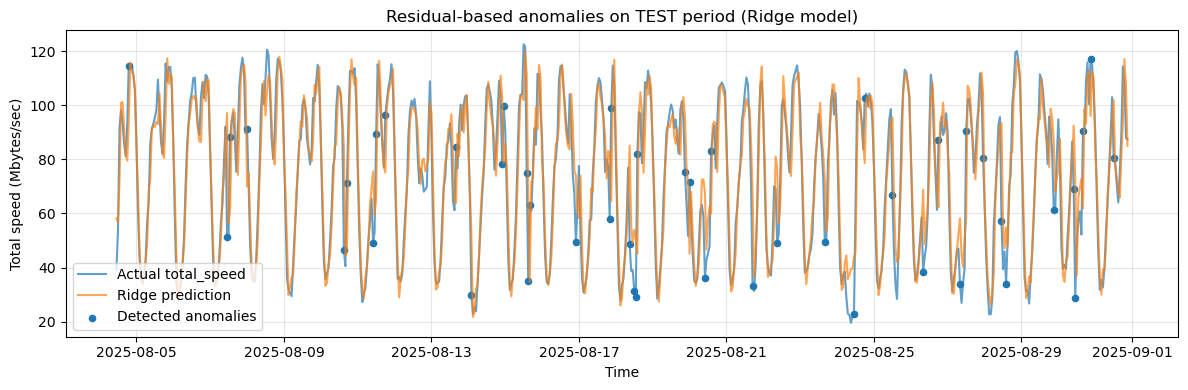

In [93]:
plt.figure(figsize=(12, 4))
plt.plot(
    df_anom_test["timestamp"],
    df_anom_test["y_true"] / 1e6,
    label="Actual total_speed",
    alpha=0.7,
)
plt.plot(
    df_anom_test["timestamp"],
    df_anom_test["y_ridge"] / 1e6,
    label="Ridge prediction",
    alpha=0.7,
)
anom_points = df_anom_test[df_anom_test["is_anomaly"]]
plt.scatter(
    anom_points["timestamp"],
    anom_points["y_true"] / 1e6,
    label="Detected anomalies",
    s=20,
)

plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/sec)")
plt.title("Residual-based anomalies on TEST period (Ridge model)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<h3>7.4: Zoom-in plot (last 7 days of TEST set) </h3>

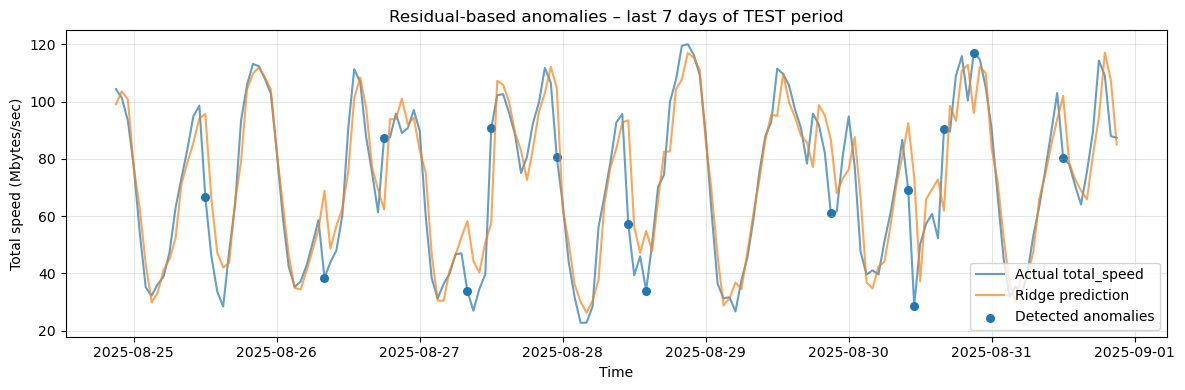

In [94]:
last_timestamp = df_anom_test["timestamp"].max()
window_start = last_timestamp - pd.Timedelta(days=7)

mask_last_week = df_anom_test["timestamp"] >= window_start
df_last_week = df_anom_test[mask_last_week]

plt.figure(figsize=(12, 4))

plt.plot(
    df_last_week["timestamp"],
    df_last_week["y_true"] / 1e6,
    label="Actual total_speed",
    alpha=0.7,
)
plt.plot(
    df_last_week["timestamp"],
    df_last_week["y_ridge"] / 1e6,
    label="Ridge prediction",
    alpha=0.7,
)

anom_last_week = df_last_week[df_last_week["is_anomaly"]]
plt.scatter(
    anom_last_week["timestamp"],
    anom_last_week["y_true"] / 1e6,
    label="Detected anomalies",
    s=30,
)

plt.xlabel("Time")
plt.ylabel("Total speed (Mbytes/sec)")
plt.title("Residual-based anomalies – last 7 days of TEST period")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<h3>7.5: Top N anomalies table</h3>

In [95]:
df_top_anom = df_anom_test[df_anom_test["is_anomaly"]].copy()
df_top_anom["abs_residual"] = df_top_anom["residual"].abs()

N = 15  # top N anomalies
df_top_anom = df_top_anom.sort_values("abs_residual", ascending=False).head(N)

print(f"\nTop {N} anomalies in TEST set (sorted by |residual|):")
cols_to_show = ["timestamp", "y_true", "y_ridge", "residual", "anomaly_type"]
print(df_top_anom[cols_to_show])


Top 15 anomalies in TEST set (sorted by |residual|):
              timestamp       y_true       y_ridge      residual anomaly_type
72  2025-08-07 11:00:00  51419444.79  9.708342e+07 -4.566398e+07         drop
624 2025-08-30 11:00:00  28723584.94  7.364411e+07 -4.492053e+07         drop
148 2025-08-10 15:00:00  46458961.15  8.492356e+07 -3.846460e+07         drop
339 2025-08-18 14:00:00  81950850.55  4.515109e+07  3.679976e+07        spike
267 2025-08-15 14:00:00  74772933.62  1.115011e+08 -3.672818e+07         drop
334 2025-08-18 09:00:00  48574183.49  8.510216e+07 -3.652798e+07         drop
576 2025-08-28 11:00:00  57300436.46  9.342315e+07 -3.612272e+07         drop
414 2025-08-21 17:00:00  33086144.16  6.789608e+07 -3.480993e+07         drop
322 2025-08-17 21:00:00  98896855.00  6.461089e+07  3.428597e+07        spike
553 2025-08-27 12:00:00  90601788.58  5.760181e+07  3.299998e+07        spike
383 2025-08-20 10:00:00  36111578.09  6.763912e+07 -3.152754e+07         drop
268 2025-0

<h3>7.6: Summary</h3>

In this section, we used the Ridge regression model as a reference forecaster and analysed its residuals (actual − predicted) to detect unusual behaviour in the test period.

On the training set, the residuals are almost perfectly centred around zero (mean ≈ 0, standard deviation ≈ 8.3×10^6 bytes/sec ≈ 8 MB/s). This confirms that the Ridge model is well calibrated on “normal” traffic.

We defined anomalies as points where the residual is larger than ±2.5 standard deviations, i.e. roughly ±2.07×10^7 bytes/sec (~20 MB/s) away from the mean. Any point outside this band is treated as an unusual deviation from the model’s expectation.

On the test set, this rule flagged 46 anomalous points in total:
- 28 “drop” anomalies (actual traffic much lower than predicted),
- 18 “spike” anomalies (actual traffic much higher than predicted),
- while 613 points were classified as normal.

The time-series plots show that overall, Ridge predictions follow the actual traffic curve very closely, and detected anomalies correspond to sudden dips or peaks relative to the surrounding hours rather than small random noise. In the zoomed last-7-days plot, anomalies tend to appear around sharp local changes (for example, sudden drops after periods of high load).

The Top-N anomalies table highlights specific timestamps where the difference between actual and predicted traffic is largest. Many of these are large negative residuals (drops), which may correspond to short outages, throttling, or temporary under-utilisation. The positive residuals (spikes) may indicate exceptional bursts of traffic that the model did not expect based on recent history.

Overall, this phase shows that although the forecasting model fits the normal traffic pattern well, a small subset of time points deviates strongly from the learned behaviour. These points are good candidates for network operator investigation as potential incidents or unusual usage patterns, and they will be used in the next phase for comparative analysis between models.


<h2>8: Comparative analysis of models and anomalies </h2>

<h3> 8.1: Prepare regression and classification metrics for comparison </h3>

In [98]:
reg_test = reg_results[reg_results["dataset"] == "test"].copy()
clf_test = clf_results[clf_results["dataset"] == "test"].copy()

print("\nRegression models – TEST metrics:")
print(reg_test)

print("\nClassification models – TEST metrics (heavy class):")
print(clf_test)


Regression models – TEST metrics:
    model dataset           MAE          RMSE        R2
1   Naive    test  1.965641e+07  2.437781e+07  0.213535
3  Linear    test  7.441363e+06  1.049799e+07  0.854151
5   Ridge    test  7.593664e+06  1.061741e+07  0.850814
7  RF_Reg    test  7.735898e+06  1.168713e+07  0.819238

Classification models – TEST metrics (heavy class):
      model dataset       acc  prec_heavy  rec_heavy  f1_heavy
1  Logistic    test  0.890744    0.659574   0.356322  0.462687
3    RF_Clf    test  0.899848    0.656716   0.505747  0.571429


<h3>8.2: Compare regression models (Naive vs Linear vs Ridge vs RF_Reg) </h3>

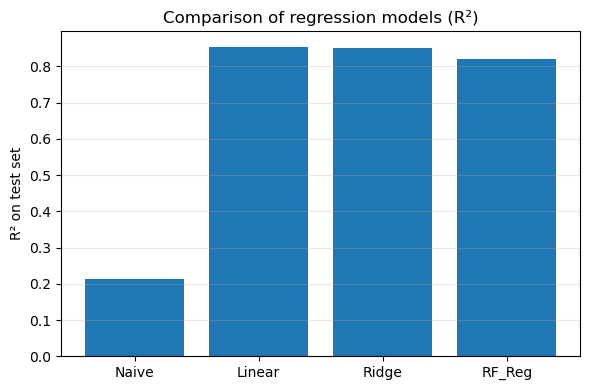

In [99]:
plt.figure(figsize=(6, 4))
plt.bar(reg_test["model"], reg_test["R2"])
plt.ylabel("R² on test set")
plt.title("Comparison of regression models (R²)")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

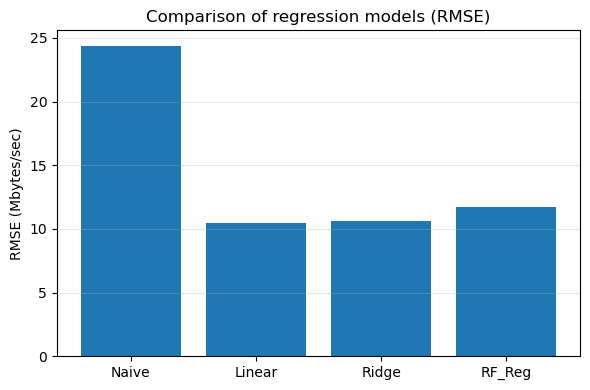

In [100]:
plt.figure(figsize=(6, 4))
plt.bar(reg_test["model"], reg_test["RMSE"] / 1e6)
plt.ylabel("RMSE (Mbytes/sec)")
plt.title("Comparison of regression models (RMSE)")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [101]:
baseline_rmse = float(
    reg_test.loc[reg_test["model"] == "Naive", "RMSE"].iloc[0]
)

reg_improvements = []
for m in ["Linear", "Ridge", "RF_Reg"]:
    rmse_m = float(reg_test.loc[reg_test["model"] == m, "RMSE"].iloc[0])
    impr_pct = 100 * (1 - rmse_m / baseline_rmse)
    reg_improvements.append((m, rmse_m, impr_pct))

print("\nImprovement of regression models vs naive baseline (TEST):")
for m, rmse_m, impr_pct in reg_improvements:
    print(
        f"  {m:6s}: RMSE = {rmse_m:,.0f}  "
        f"({impr_pct:5.1f}% lower than Naive)"
    )


Improvement of regression models vs naive baseline (TEST):
  Linear: RMSE = 10,497,986  ( 56.9% lower than Naive)
  Ridge : RMSE = 10,617,406  ( 56.4% lower than Naive)
  RF_Reg: RMSE = 11,687,131  ( 52.1% lower than Naive)


In [102]:
best_reg_row = reg_test.sort_values("R2", ascending=False).iloc[0]
best_reg_model = best_reg_row["model"]
print(f"\nBest regression model on TEST (by R²): {best_reg_model} "
      f"with R² = {best_reg_row['R2']:.3f}")


Best regression model on TEST (by R²): Linear with R² = 0.854


<h3>8.3: Compare classification models (Logistic vs RF_Clf) </h3>

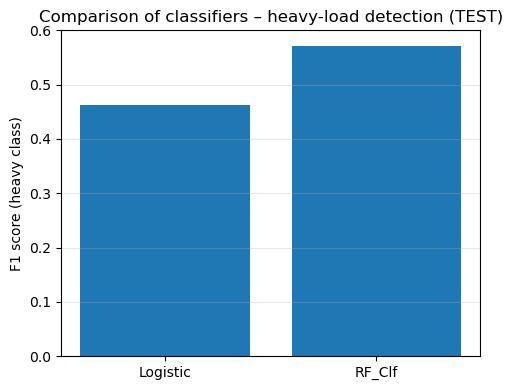

In [103]:
plt.figure(figsize=(5, 4))
plt.bar(clf_test["model"], clf_test["f1_heavy"])
plt.ylabel("F1 score (heavy class)")
plt.title("Comparison of classifiers – heavy-load detection (TEST)")
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

In [106]:
log_row = clf_test[clf_test["model"] == "Logistic"].iloc[0]
rf_row  = clf_test[clf_test["model"] == "RF_Clf"].iloc[0]

f1_impr = 100 * (rf_row["f1_heavy"] - log_row["f1_heavy"]) / log_row["f1_heavy"]

print("\nHeavy-load classification – key comparison (TEST):")
print(f"  Logistic: acc = {log_row['acc']:.3f}, "
      f"F1 (heavy) = {log_row['f1_heavy']:.3f}")
print(f"  RF_Clf  : acc = {rf_row['acc']:.3f}, "
      f"F1 (heavy) = {rf_row['f1_heavy']:.3f}")
print(f"  → RF_Clf improves F1(heavy) over Logistic by about {f1_impr:.1f}%")


Heavy-load classification – key comparison (TEST):
  Logistic: acc = 0.891, F1 (heavy) = 0.463
  RF_Clf  : acc = 0.900, F1 (heavy) = 0.571
  → RF_Clf improves F1(heavy) over Logistic by about 23.5%


<h3>8.4: Summarise anomaly detection behaviour</h3>

In [107]:
num_points_test = len(df_anom_test)
num_anom = int(df_anom_test["is_anomaly"].sum())
num_spikes = int((df_anom_test["anomaly_type"] == "spike").sum())
num_drops  = int((df_anom_test["anomaly_type"] == "drop").sum())
anom_pct = 100 * num_anom / num_points_test

print("\nResidual-based anomalies – summary (TEST set):")
print(f"  Mean residual (train): {res_mean:.2f}")
print(f"  Std residual  (train): {res_std:.2f}")
print(f"  Thresholds: [{lower_threshold:.2f}, {upper_threshold:.2f}] bytes/sec")
print(f"  Total test points: {num_points_test}")
print(f"  Total anomalies  : {num_anom} "
      f"({anom_pct:.2f}% of test set)")
print(f"    - spikes: {num_spikes}")
print(f"    - drops : {num_drops}")


Residual-based anomalies – summary (TEST set):
  Mean residual (train): 0.00
  Std residual  (train): 8271599.91
  Thresholds: [-20678999.77, 20678999.77] bytes/sec
  Total test points: 659
  Total anomalies  : 46 (6.98% of test set)
    - spikes: 18
    - drops : 28


<h3>8.5: Summary</h3>

Comparative analysis – main findings and interpretation

1. Forecasting models (regression)
- On the TEST set, all ML models beat the naïve “next hour = this hour” baseline by a large margin.
- Naive model: highest error (RMSE ≈ 24.4 Mbytes/sec, R² ≈ 0.21).
- Linear Regression: RMSE ≈ 10.5 Mbytes/sec, R² ≈ 0.854 → about 56.9% lower RMSE than Naive.
- Ridge Regression: RMSE ≈ 10.6 Mbytes/sec, R² ≈ 0.851 → about 56.4% lower RMSE than Naive.
- Random Forest Regressor: RMSE ≈ 11.7 Mbytes/sec, R² ≈ 0.819 → about 52.1% lower RMSE than Naive.
- Best model by R² is the simple Linear Regression, with Ridge extremely close and Random Forest slightly worse.

Why did we get this?
- The traffic time series has very strong linear structure: next-hour speed is highly correlated with the current hour, recent lags and daily/weekly patterns.
- Because of this, a linear model with the right time features already captures most of the predictable structure, so adding non-linear complexity (Random Forest) does not bring a big gain and can even hurt slightly.
- The huge improvement vs the naïve baseline comes from using time-based features (hour, day of week, lags, rolling mean) instead of just copying last value.

2. Heavy-load detection (classification)
- Logistic Regression (TEST): accuracy ≈ 0.891, F1(heavy) ≈ 0.463, recall(heavy) ≈ 0.36.
- Random Forest Classifier (TEST): accuracy ≈ 0.900, F1(heavy) ≈ 0.571, recall(heavy) ≈ 0.51.
- RF_Clf has slightly higher overall accuracy but, more importantly, about 23–24% higher F1 on the heavy class and much better recall.

Why did we get this?
- Whether a time step is “heavy load” is defined by a threshold on total_speed, which is a non-linear boundary in feature space.
- Logistic Regression only learns a single linear decision boundary, so it struggles to separate borderline heavy vs normal points, especially around the threshold.
- Random Forest can carve more complex regions in feature space using the same features and therefore detects more of the true heavy-load hours without exploding the number of false positives, which is reflected in higher F1 and recall.

3. Residual-based anomaly detection
- Using Ridge residuals on TEST:
  • Mean residual (train) ≈ 0, std ≈ 8.28×10^6 bytes/sec.
  • Anomaly thresholds set at ±2.5σ → roughly ±2.07×10^7 bytes/sec.
  • Total test points: 659.
  • Total anomalies: 46 (≈ 6.98% of test set), with 18 “spikes” and 28 “drops”.
- Plots show that anomalies occur at sharp local peaks or dips relative to the prediction curve.

Why did we get this?
- The Ridge model fits the regular daily/weekly pattern well, so most points have small residuals around zero.
- When the network behaves unusually (sudden burst or drop in speed compared with recent history), the model cannot fully predict this, so the residual becomes very large and passes the ±2.5σ threshold.
- Because the network is mostly stable, true anomalies are rare in this dataset, so only a small fraction of points (about 7%) are flagged. This is exactly what we expect from a healthy system with occasional incidents.

Overall conclusion
- For this real traffic dataset, simple linear models are strong baselines for forecasting because the main patterns are linear and strongly time-driven.
- Tree-based models do not dramatically improve regression performance, but they do help for the non-linear classification problem of heavy-load detection.
- Residual-based anomaly detection on top of a well-calibrated regression model successfully highlights a small set of time steps with unusual behaviour (spikes and drops), which are valuable for network monitoring and incident analysis.
